# Machine Learning Models Predict RCC From Urine Metabolomics

Author: Olatomiwa Bifarin<br>
Department of Biochemistry and Molecular Biology<br>
University of Georgia<br>
Edison Lab<br>

Last edited: 18DEC2019 

_This is a static version of a Jupyter notebook, and work (documentation) is still in progress_ 

**Goals**: 
1. To merge NMR and MS Dataset. 

<a id="0"></a>

## Notebook Content

1.  [NMR-MS Data Merge](#1)
2.  [Cohort Characteristics: Pre-Matched Group](#2)
3.  [Propensity Matching: Model Cohort](#3)
4.  [Cohort Characteristics: Post-Matched Group (Model Cohort)](#4)
5.  [RCC Prediction in Model Cohort](#5)
6.  [Cohort Characteristics: Test Cohort](#6)
7.  [RCC Prediction: Test Cohort](#7)
8.  [Chemical Information of Biomarkers](#8)


## Dataframes
-  The original form of the MS data from the Facundo Lab at Georgia tech is uploaded as the `dfMS` dataframe.
-  `MS-Labels` is the dataframe for Mass Spectrometry detected metabolites IDs, mode, retention time and formula
-  `MS` is the dataframe for the MS Peak Intensities
-  `MSData` is the dataframe for `all` the MS Peak Intensities with patient ID and Groups
-  `dfNMR` contains representative peaks for features/metabolites from NMR
-  `combined` is the NMR merged with the MS dataset. 
-  `combined_clinic` is the dataframe that contains all combined NMR and MS samples collected in the clinic. 
-  `PMdata`
-  `PMdata2`
-  `modelcohort`
-  `testcohort`
-  `qfeatures`
-  `MLfeatures??`
-  `MLfeatures2??`
-  `biomarker`
-  `biomarker2`
-  `MS_labels_bmarkers`
-  `MS_labels_qmarkers`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import scipy
#For Seaborn plots
import seaborn as sns; sns.set(style='white')
#To ignore warning
import warnings
warnings.filterwarnings('ignore')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=0.8)

# 1. NMR-MS Data Merge
<a id="1"></a>

The original form of the MS data from the `Facundo Lab` at Georgia tech is uploaded as the `dfMS` dataframe.

In [2]:
dfMS = pd.read_excel('data/RCC_S280_combinedData_7097.xlsx')

In [3]:
dfMS_trans = dfMS.T # Transpose dataframe
IDs = np.arange(1, dfMS_trans.shape[1] + 1) # Generate a range of numbers (7098) to replace nan values in the name row
IDs = pd.Series(IDs) # creating series 
dfMS_trans.iloc[4] = dfMS_trans.iloc[4].fillna(IDs) # replace nan with the IDs, and replace the name row
dfMS_trans.head(8)

0            1            2             3     \
ID                          1            2            3             4   
Mode                 positive     positive     positive      positive   
Molecular Weight      186.015      113.059      113.059       234.173   
RT [min]                2.317        2.792        2.889         0.884   
Name                        1   Creatinine   Creatinine     Lidocaine   
Formula                   NaN   C4 H7 N3 O   C4 H7 N3 O  C14 H22 N2 O   
C001              7.24885e+08  1.10388e+09  5.06818e+06        4682.6   
C002              8.39383e+08  1.87456e+09  1.87657e+09   1.69931e+08   

                           4                5                            6     \
ID                            5                6                            7   
Mode                   positive         positive                     positive   
Molecular Weight        290.137          314.141                      125.084   
RT [min]                  1.512            2.666                        1.181   
Name               Trimethoprim       Ranitidine  4,5-Dimethyl-2-ethyloxazole   
Formula           C14 H18 N4 O3  C13 H22 N4 O3 S                   C7 H11 N O   
C001                    18261.9          1322.95                        61663   
C002                    18267.8          1674.72                       227698   

                                               7     \
ID                                                8   
Mode                                       positive   
Molecular Weight                            143.095   
RT [min]                                      1.221   
Name              1-Aminocyclohexanecarboxylic acid   
Formula                                 C7 H13 N O2   
C001                                         191620   
C002                                         532662   

                                                  8            9       ...     \
ID                                                   9           10    ...      
Mode                                          positive     positive    ...      
Molecular Weight                               198.075      171.126    ...      
RT [min]                                         1.901        3.507    ...      
Name              5-Acetylamino-6-amino-3-methyluracil   Gabapentin    ...      
Formula                                   C7 H10 N4 O3  C9 H17 N O2    ...      
C001                                       5.61943e+07       4369.9    ...      
C002                                       2.03319e+08      5449.04    ...      

                               7087       7088      7089  \
ID                             7088       7089      7090   
Mode                       negative   negative  negative   
Molecular Weight            336.051    154.048   159.976   
RT [min]                       0.66      1.197     4.737   
Name                           7088       7089      7090   
Formula           C7 H23 N4 O P3 S2  C4 H10 O6  C5 H7 P3   
C001                         168447    81645.2    501574   
C002                        36254.4     242145    876199   

                                   7090      7091      7092              7093  \
ID                                 7091      7092      7093              7094   
Mode                           negative  negative  negative          negative   
Molecular Weight                260.137   304.096   172.047           334.083   
RT [min]                           2.94     0.656     3.203             2.629   
Name              gamma-Glutamylleucine      7092      7093              7094   
Formula                   C11 H20 N2 O5       NaN       NaN  C6 H19 N6 O6 P S   
C001                            43882.9    235674    141900            144189   
C002                             274884    236921    167226            114217   

                         7094         7095      7096  
ID                       7095         7096      7097  
Mode                 negative 

`MS-Labels` is the dataframe for just MS detected metabolites IDs and some chemical properties.

In [4]:
MS_labels = dfMS_trans.T # Transpose data frame
MS_labels = MS_labels.filter(['ID', 'Mode', 'RT [min]', 'Name', 'Formula'], axis=1)
MS_labels.head()

ID      Mode RT [min]          Name        Formula
0  1  positive    2.317             1            NaN
1  2  positive    2.792    Creatinine     C4 H7 N3 O
2  3  positive    2.889    Creatinine     C4 H7 N3 O
3  4  positive    0.884     Lidocaine   C14 H22 N2 O
4  5  positive    1.512  Trimethoprim  C14 H18 N4 O3

`MS` is the dataframe for the MS Peak Intensities

In [10]:
MS = dfMS_trans.drop(['Mode', 'Molecular Weight', 'Name', 'RT [min]', 'Formula'])
MS.index.name = 'MS_ID'
MS.reset_index(inplace=True) # Converts the row names into a column.
header = MS.iloc[0] # Create a new variable called 'header' from the first row of the dataset
MS = MS[1:] # Replace the dataframe with a new one which does not contain the first row
MS.rename(columns = header, inplace=True)# Rename the dataframe's column values with the header variable
MS.rename(columns={'ID':'Sample ID'}, inplace = True) # Rename column name
# To rest the row index to start from 0
MS.index = MS.index - 1 
MS.head()

Sample ID            1            2            3            4        5  \
0      C001  7.24885e+08  1.10388e+09  5.06818e+06       4682.6  18261.9   
1      C002  8.39383e+08  1.87456e+09  1.87657e+09  1.69931e+08  18267.8   
2      C003  7.65629e+08  1.67333e+09  7.47349e+06      8567.13  25730.9   
3      C004  1.25663e+08   1.1825e+09  1.17911e+09  6.72327e+06  10526.3   
4      C005  1.06973e+07  8.79722e+08  8.56535e+08       438385  15913.8   

         6       7       8            9   ...            7088     7089  \
0  1322.95   61663  191620  5.61943e+07   ...          168447  81645.2   
1  1674.72  227698  532662  2.03319e+08   ...         36254.4   242145   
2  3246.46  133905  495502  1.92514e+08   ...     1.82785e+06   273594   
3  1076.99  129811  392377  1.16585e+08   ...          450210   308199   
4  1008.31   48496  122696  1.10997e+07   ...         22167.5  39971.3   

     7090     7091    7092     7093     7094         7095     7096     7097  
0  501574  43882.9  235674   141900   144189  1.65926e+06   105636  76801.7  
1  876199   274884  236921   167226   114217       771149   303623  37380.4  
2  946435  97021.7  839316   519959   467160   1.2216e+06   219606  6270.59  
3  343794  7427.46  275350   145776  64094.9   1.7718e+06   197519  60830.9  
4  156251  718.724  199148  50598.8   107228      58713.6  71784.4  75589.5  

[5 rows x 7098 columns]

___Import Dataframe containing Clinical ID___

In [14]:
path = "data/Sample_List_MS.xlsx"
fields = \
[
    'Sample ID',
    'Patient ID'
]

MSpatid = pd.read_excel(path)[fields]
MSpatid.head()

Sample ID Patient ID
0      C001      PD001
1      C002      PD003
2      C003      PD005
3      C004      PD012
4      C005      PD014

`MSData` is the dataframe for the MS Peak Intensities with <mark>Patient ID</mark> and <mark>Groups</mark>

In [15]:
MSData = pd.merge(MS, MSpatid, on='Sample ID') # Merge the two dataframe on Sample ID
MSData.head()

Sample ID            1            2            3            4        5  \
0      C001  7.24885e+08  1.10388e+09  5.06818e+06       4682.6  18261.9   
1      C002  8.39383e+08  1.87456e+09  1.87657e+09  1.69931e+08  18267.8   
2      C003  7.65629e+08  1.67333e+09  7.47349e+06      8567.13  25730.9   
3      C004  1.25663e+08   1.1825e+09  1.17911e+09  6.72327e+06  10526.3   
4      C005  1.06973e+07  8.79722e+08  8.56535e+08       438385  15913.8   

         6       7       8            9    ...         7089    7090     7091  \
0  1322.95   61663  191620  5.61943e+07    ...      81645.2  501574  43882.9   
1  1674.72  227698  532662  2.03319e+08    ...       242145  876199   274884   
2  3246.46  133905  495502  1.92514e+08    ...       273594  946435  97021.7   
3  1076.99  129811  392377  1.16585e+08    ...       308199  343794  7427.46   
4  1008.31   48496  122696  1.10997e+07    ...      39971.3  156251  718.724   

     7092     7093     7094         7095     7096     7097 Patient ID  
0  235674   141900   144189  1.65926e+06   105636  76801.7      PD001  
1  236921   167226   114217       771149   303623  37380.4      PD003  
2  839316   519959   467160   1.2216e+06   219606  6270.59      PD005  
3  275350   145776  64094.9   1.7718e+06   197519  60830.9      PD012  
4  199148  50598.8   107228      58713.6  71784.4  75589.5      PD014  

[5 rows x 7099 columns]

*Merge NMR and MS Data*

In [16]:
dfNMR = pd.read_excel('data/Original_NMRData_h179_c105.xlsx')
dfNMR.rename(columns={'Sample_ID':'Patient ID'}, inplace = True) # Rename column name
dfNMR.head()

Patient ID Collection  Gender   Race   BMI  Smoker   Age   Groups  Pyruvate  \
0       2000     Clinic    Male  White  31.1   Never  49.0  Control  0.055397   
1       2001     Clinic    Male  White  28.6   Never  52.0  Control  0.047295   
2       2002     Clinic  Female  White  28.6  Former  70.0  Control  0.054055   
3       2003     Clinic    Male  White  25.7  Former  54.0  Control  0.046657   
4       2004     Clinic    Male  White  25.9   Never  50.0  Control  0.053708   

   Hippurate    ...         unk2      unk3      unk4      unk5      unk6  \
0   0.537630    ...     0.009648  0.125907  0.173532  0.521688  0.046473   
1   0.525002    ...     0.005114  0.118829  0.221293  0.305353  0.091866   
2   1.614244    ...     0.004722  0.155625  0.123111  0.225807  0.068939   
3   0.920823    ...     0.004493  0.140868  0.118381  0.222150  0.074157   
4   0.307889    ...     0.002801  0.154196  0.175370  0.495230  0.052365   

       unk7      unk8      unk9     unk10     unk11  
0  0.380187  0.004881  0.004257  0.025070  0.000836  
1  0.371257  0.005311  0.002300  0.000710  0.000375  
2  0.242890  0.006013  0.002982  0.021196  0.002216  
3  1.089683  0.007085  0.003080  0.007703  0.000675  
4  0.522921  0.006462  0.003523  0.001621 -0.000465  

[5 rows x 47 columns]

In [18]:
combined = pd.merge(MSData, dfNMR, on='Patient ID') # Merge the two dataframe on Sample ID
combined.head()

Sample ID            1            2            3            4        5  \
0      C001  7.24885e+08  1.10388e+09  5.06818e+06       4682.6  18261.9   
1      C002  8.39383e+08  1.87456e+09  1.87657e+09  1.69931e+08  18267.8   
2      C003  7.65629e+08  1.67333e+09  7.47349e+06      8567.13  25730.9   
3      C004  1.25663e+08   1.1825e+09  1.17911e+09  6.72327e+06  10526.3   
4      C005  1.06973e+07  8.79722e+08  8.56535e+08       438385  15913.8   

         6       7       8            9    ...         unk2      unk3  \
0  1322.95   61663  191620  5.61943e+07    ...     0.004880  0.117647   
1  1674.72  227698  532662  2.03319e+08    ...     0.012424  0.285972   
2  3246.46  133905  495502  1.92514e+08    ...     0.008217  0.129223   
3  1076.99  129811  392377  1.16585e+08    ...     0.005146  0.129948   
4  1008.31   48496  122696  1.10997e+07    ...     0.010517  0.108334   

       unk4      unk5      unk6      unk7      unk8      unk9     unk10  \
0  0.147420  0.543905  0.054397  0.319233  0.007420  0.003132  0.001784   
1  0.102257  0.080530  0.065652  0.160480  0.007992  0.003616  0.002637   
2  0.106857  0.254843  0.060091  0.539889  0.005810  0.003354  0.001337   
3  0.146378  0.288247  0.057414  0.216959  0.005343  0.003233  0.030722   
4  0.119643  0.272267  0.063288  0.315136  0.005065  0.016260  0.004842   

      unk11  
0  0.001298  
1  0.000639  
2  0.001725  
3  0.001060  
4  0.001810  

[5 rows x 7145 columns]

Non-metabolic features in the `combined` dataframe include the following: 
-  Sample ID
-  Patient ID
-  Collection
-  Gender
-  Race
-  BMI
-  Smoker
-  Age
-  Groups

combinedrevised = combined.loc[:,~combined.columns.duplicated()] <br>
_Removes all feature duplicates_ <br>
_Export `combinedrevised` dataframe_ <br>
combinedrevised.to_excel('combinedNMRMS_DuplicatesRemoved.xlsx')

The shape of the MS, NMR, and the combined dataframe

In [20]:
print(dfNMR.shape)
print (MSData.shape)
print (combined.shape)

(284, 47)
(280, 7099)
(256, 7145)


The group numbers in MS, NMR, and the combined dataframe

In [24]:
print(dfNMR.Groups.value_counts())
print(dfMS.Groups.value_counts())
print(combined.Groups.value_counts())

Control    179
RCC        105
Name: Groups, dtype: int64
Control    178
RCC        102
Name: Groups, dtype: int64
Control    174
RCC         82
Name: Groups, dtype: int64


In [22]:
combined['Collection'].value_counts()

Clinic    205
OR         51
Name: Collection, dtype: int64

`combined_clinic` is the dataframe that contains all combined NMR and MS samples collected in the clinic. 

In [32]:
# Remove all operating samples because of the potential bais
combined_clinic = combined[combined['Collection'] != 'OR']
print(combined_clinic.Groups.value_counts())

Control    174
RCC         31
Name: Groups, dtype: int64


### [Go back to notebook content](#0)

# 2. Cohort Characteristics: Pre-Matched Groups
<a id="2"></a>

_Pie Chart Function_

In [33]:
def pieChart(dataframe, tilt_num, explode=False, shadow=False): 
    '''
    DEPENDENCY: matplotlib.pyplot.pie
    
    INPUTS: 
    dataframe = A pandas dataframe with category in the first column and associated data in the second column
    tilt_num = A number that specifies the amount of offset to apply to the wedge corresponding to the dataset 
    on the last row. The purpose of this is to make pie-chart annotation visible in the case of an overlapping 
    annotation. For best results, choose number between 0 and 1.  
    
    explode = Boolean. Set to True to make the tilt_num parameters applicable. 
    
    shadow = Boolean. Set to True for wedge shadows
    
    OUTPUTS: A pie chart figure. 
    
    '''
    if explode==False: 
        plt.pie(
        # using data
        dataframe.iloc[:, 1],
        # labels
        labels=dataframe.iloc[:, 0],
        # with no shadows
        shadow=shadow,
        # with the start angle at 90%
        startangle=90,
        # with the percent listed as a fraction
        autopct='%1.1f%%')
    
        # View the plot drop above
        plt.axis('equal')
        # View the plot
        plt.tight_layout()
        fig = plt.show()
        return fig
    else:
        lst = [0] * dataframe.shape[0] # create a list of length equal to number of pie, sets to zero
        lst[-1] = tilt_num # replace the last digit of lst with the tilt_num
        plt.pie(dataframe.iloc[:, 1], labels=dataframe.iloc[:, 0],
        shadow=shadow, explode=lst, startangle=90, autopct='%1.1f%%')
    
        # View the plot drop above
        plt.axis('equal')
        # View the plot
        plt.tight_layout()
        fig = plt.show()
    return fig

### a. Categorical Meta-Data

In [44]:
combined_clinic = combined[combined['Collection'] != 'OR']
combined_clinic.Race.value_counts()

White          183
Black/AA        14
Unk/Missing      6
Asian            1
Mixed            1
Name: Race, dtype: int64

In [45]:
combined_clinic['Race'] = combined_clinic['Race'].map({'White': 'White',
                                         'Black/AA': 'Black/AA', 
                                         'Unk/Missing': 'Others',
                                         'Mixed': 'Others', 
                                         'Asian': 'Others'})
combined.Race.value_counts()

White                             218
Black/AA                           25
Unk/Missing                         8
Asian                               2
American-Indian/Alaskan-Native      1
Mixed                               1
Name: Race, dtype: int64

In [46]:
dControl = combined_clinic[(combined_clinic['Groups'] == 'Control')]
dRCC = combined_clinic[(combined_clinic['Groups'] == 'RCC')]

___Race___

In [47]:
print(dControl['Race'].value_counts())
print(dControl['Race'].value_counts(normalize=True)*100)
print(dRCC['Race'].value_counts())
print(dRCC['Race'].value_counts(normalize=True)*100)

White       162
Others        7
Black/AA      5
Name: Race, dtype: int64
White       93.103448
Others       4.022989
Black/AA     2.873563
Name: Race, dtype: float64
White       21
Black/AA     9
Others       1
Name: Race, dtype: int64
White       67.741935
Black/AA    29.032258
Others       3.225806
Name: Race, dtype: float64


_Healthy Control_

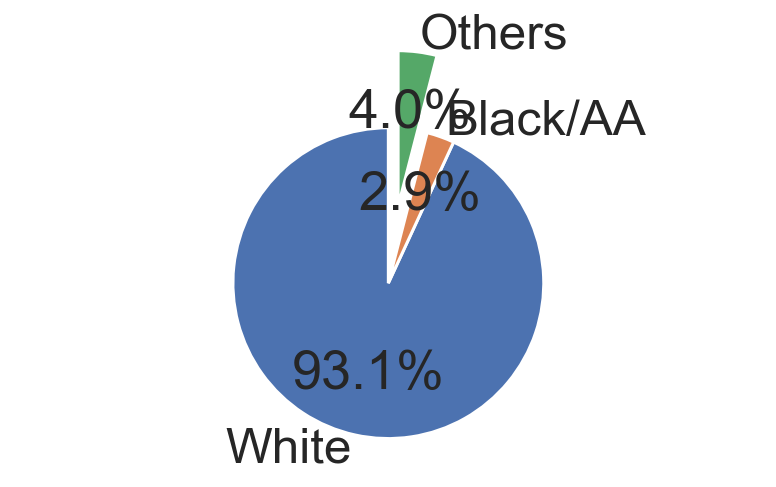

In [48]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=1.5)
raw_data = {'Race': ['White', 'Black/AA', 'Others'], 
            'Numbers': [162, 5, 7]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=True, shadow = False)

___Smoking History___

In [49]:
combined_clinic.Smoker.value_counts()

Never      150
Former      46
Current      9
Name: Smoker, dtype: int64

In [50]:
combined_clinic['Smoker'] = combined_clinic['Smoker'].map({'Never': 'Never',
                                         'Former': 'Former/Current', 
                                         'Current': 'Former/Current'})

In [51]:
combined_clinic.Smoker.value_counts()

Never             150
Former/Current     55
Name: Smoker, dtype: int64

In [52]:
dControl = combined_clinic[(combined_clinic['Groups'] == 'Control')]
dRCC = combined_clinic[(combined_clinic['Groups'] == 'RCC')]
print(dControl['Smoker'].value_counts())
print(dControl['Smoker'].value_counts(normalize=True)*100)
print(dRCC['Smoker'].value_counts())
print(dRCC['Smoker'].value_counts(normalize=True)*100)

Never             131
Former/Current     43
Name: Smoker, dtype: int64
Never             75.287356
Former/Current    24.712644
Name: Smoker, dtype: float64
Never             19
Former/Current    12
Name: Smoker, dtype: int64
Never             61.290323
Former/Current    38.709677
Name: Smoker, dtype: float64


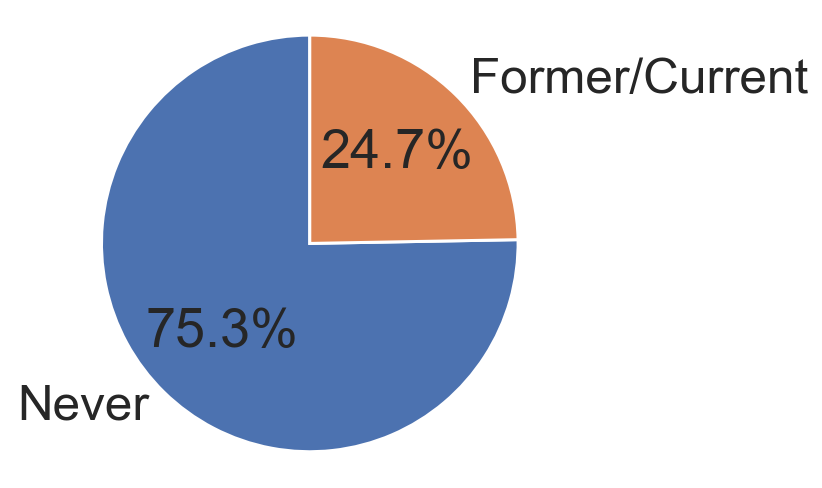

In [53]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=1.5)
raw_data = {'Smoker': ['Never', 'Former/Current'], 
            'Numbers': [131, 43]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)

___Gender___

In [54]:
print(dControl['Gender'].value_counts())
print(dControl['Gender'].value_counts(normalize=True)*100)
print(dRCC['Gender'].value_counts())
print(dRCC['Gender'].value_counts(normalize=True)*100)

Male      145
Female     29
Name: Gender, dtype: int64
Male      83.333333
Female    16.666667
Name: Gender, dtype: float64
Female    17
Male      14
Name: Gender, dtype: int64
Female    54.83871
Male      45.16129
Name: Gender, dtype: float64


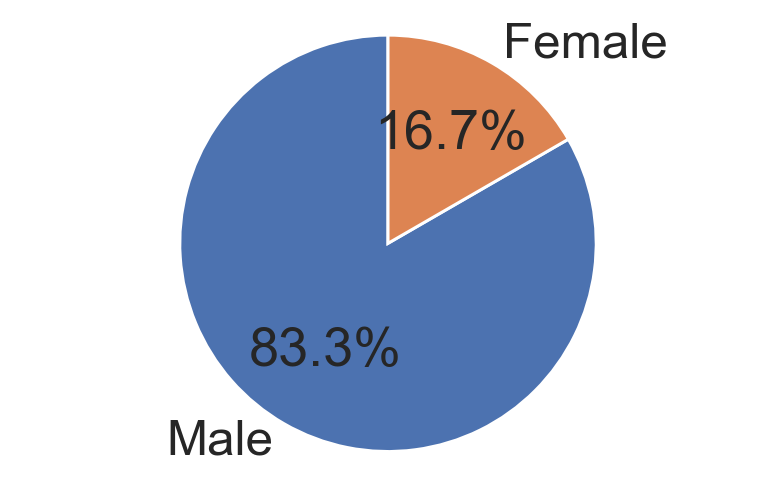

In [55]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=1.5)
raw_data = {'Gender': ['Male', 'Female'], 
            'Numbers': [145, 29]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)

### b. Quantitative Meta-Data

In [56]:
def cohortQuant(cohortID, dfControl, dfTreat, alpha=0.05, var=True):
    '''
    Function conducts a T-test for the numerical cohort characteristics between two groups
    
    Inputs: 
    cohortID = A list of the numerical cohort characteristics
    dfControl = A pandas dataframe containing the control group cohort data
    dfTreat =  A pandas dataframe containing the treatment group cohort data
    alpha = alpha for statistical significant judgment, Default 0.05
    var = If True (default), perform a standard independent 2 sample test that assumes 
    equal population variances [1]. If False, perform Welch’s t-test, which does not 
    assume equal population variance
    
    Outputs: A pandas dataframe with p-values of numerical cohort characteristics. 
    
    '''
    pvaluelist = []
    commentlist = []
    for conf in cohortID:
        statistic, pvalue = scipy.stats.ttest_ind(dfControl[conf], dfTreat[conf], 
                                              equal_var=var)
        pvaluelist.append(pvalue)
        if pvalue > alpha:
            comment = 'not significant'
        else:
            comment = 'significant'
        commentlist.append(comment)
    ConfTable = pd.DataFrame({'Confounder': cohortID, 
                              'T-test p-value': pvaluelist, 
                              'Comment': commentlist})
    return ConfTable

Welch t-test was carried out.

In [66]:
confounderID = ['Age', 'BMI']
dControl = combined_clinic[(combined_clinic['Groups'] == 'Control')]
dRCC = combined_clinic[(combined_clinic['Groups'] == 'RCC')]
cohortQuant(confounderID, dControl, dRCC, var=False)

Confounder  T-test p-value          Comment
0        Age        0.034697      significant
1        BMI        0.112672  not significant

In [62]:
BMI_Age = combined_clinic.filter(['BMI', 'Age', 'Groups']);

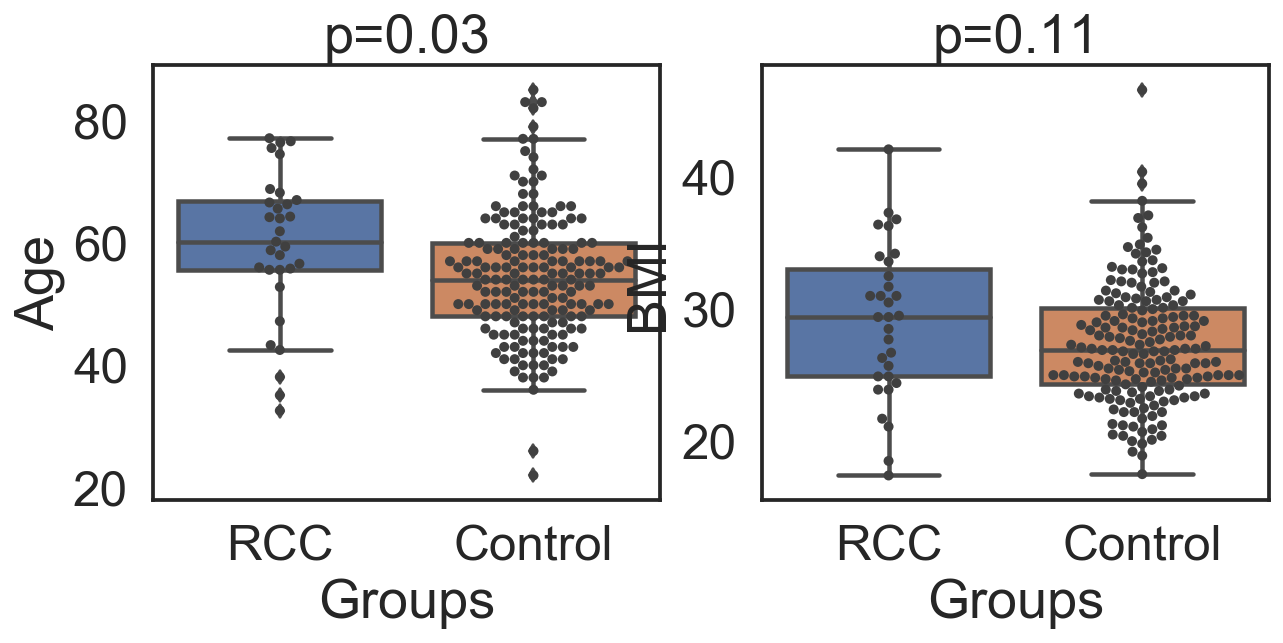

In [67]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=1.5)
_, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

Age = sns.boxplot(x='Groups', y='Age', data=BMI_Age, ax=axes[0]);
sns.swarmplot(x='Groups', y='Age', data=BMI_Age, s =5, alpha=1, color=".25", ax=axes[0])
BMI = sns.boxplot(x='Groups', y='BMI', data=BMI_Age, ax=axes[1]);
sns.swarmplot(x='Groups', y='BMI', data=BMI_Age, s =5, alpha=1, color=".25", ax=axes[1])
Age.set_title('p=0.03',loc='center');
BMI.set_title('p=0.11',loc='center');

In [68]:
print('Healthy Control mean age is', dControl['Age'].mean())
print('Healthy Control standard deviation age is', dControl['Age'].std())
print('RCC mean age is', dRCC['Age'].mean())
print('RCC standard deviation age is', dRCC['Age'].std())

Healthy Control mean age is 54.44827586206897
Healthy Control standard deviation age is 10.32563297973208
RCC mean age is 59.50322580645161
RCC standard deviation age is 12.089623205348948


In [69]:
print('Healthy Control mean age is', dControl['BMI'].mean())
print('Healthy Control standard deviation age is', dControl['BMI'].std())
print('RCC mean age is', dRCC['BMI'].mean())
print('RCC standard deviation age is', dRCC['BMI'].std())

Healthy Control mean age is 27.324137931034475
Healthy Control standard deviation age is 4.521163222291269
RCC mean age is 29.106451612903225
RCC standard deviation age is 5.800341109732022


### [Go back to notebook content](#0)

# 3. Propensity Score Matching: Model Cohort
<a id="3"></a>

**Goal**: To match healthy controls to RCC (treatments) based on age, gender, BMI, race and smoking history; optimizing for these five, using propensity score matching. 

__Code Reference:__  <br> 
Complete: https://nbviewer.jupyter.org/github/kellieotto/StatMoments/blob/master/PSM_complete.ipynb <br>
Incomplete: https://nbviewer.jupyter.org/github/kellieotto/StatMoments/blob/master/PSM.ipynb

In [71]:
import math
from scipy.stats import binom, hypergeom
from sklearn.linear_model import LogisticRegression

### a. Data Prep

In [127]:
PMdata = combined_clinic.filter(["Patient ID", "Gender", "BMI", "Smoker", 
                                 "Age", "Race", "Groups"])
PMdata.head()

Patient ID  Gender   BMI          Smoker   Age      Race Groups
0       PD001    Male  24.4           Never  38.1     White    RCC
2       PD005    Male  34.2           Never  64.0     White    RCC
8       PD030  Female  23.9           Never  74.5     White    RCC
13      PD040  Female  32.5  Former/Current  35.1     White    RCC
14      PD045  Female  24.9           Never  56.0  Black/AA    RCC

_Map Strings to Numericals_

In [128]:
d = {'Male': 0, 'Female': 1}
PMdata['Gender'] = PMdata['Gender'].map(d)
d = {'Never': 0, 'Former/Current': 1} #classify former and current smoker as one group
PMdata['Smoker'] = PMdata['Smoker'].map(d)
d = {'Control': 0, 'RCC': 1}
PMdata['Groups'] = PMdata['Groups'].map(d)
d = {'White': 0, 'Black/AA': 1, 'Others': 2 } #classify Unk/Missing, Asian, and Mixed as Others
PMdata['Race'] = PMdata['Race'].map(d)

### b. Compute Propensity Score

In [138]:
names = ['Gender', 'BMI', 'Smoker', 'Age', 'Race', 'Groups', 'Patient ID']
names[:5]

['Gender', 'BMI', 'Smoker', 'Age', 'Race']

In [130]:
propensity = LogisticRegression()
propensity = propensity.fit(PMdata[names[:5]], PMdata.Groups)
pscore = propensity.predict_proba(PMdata[names[:5]])[:,1] # The predicted propensities by the model
print (pscore[:5])

PMdata['Propensity'] = pscore

[0.09091652 0.09039211 0.28361565 0.34253826 0.42695976]


### c. Matching

In [131]:
def MatchMany(groups, propensity, method = "caliper", k = 1, 
              caliper = 0.01, caliper_method = "propensity", replace = True):
    ''' 
    Implements greedy one-to-many matching on propensity scores.
    
    Inputs:
    groups = Array-like object of treatment assignments.  Must be 2 groups
    propensity = Array-like object containing propensity scores for each observation. Propensity and groups should be in the same order (matching indices)
    method = a string: "caliper" (default) to select all matches within a given range, "knn" for k nearest neighbors,
    k = an integer (default is 1). If method is "knn", this specifies the k in k nearest neighbors
    caliper = a numeric value, specifies maximum distance (difference in propensity scores or SD of logit propensity) 
    caliper_method = a string: "propensity" (default) if caliper is a maximum difference in propensity scores,
            "logit" if caliper is a maximum SD of logit propensity, or "none" for no caliper
    replace = Logical for whether individuals from the larger group should be allowed to match multiple individuals in the smaller group.
        (default is True)
    
    Output:
    A series containing the individuals in the control group matched to the treatment group.
    Note that with caliper matching, not every treated individual may have a match within calipers.
        In that case we match it to its single nearest neighbor.  The alternative is to throw out individuals with no matches, but then we'd no longer be estimating the ATT.
    '''

    # Check inputs
    if any(propensity <=0) or any(propensity >=1):
        raise ValueError('Propensity scores must be between 0 and 1')
    elif not(0<=caliper<1):
        if caliper_method == "propensity" and caliper>1:
            raise ValueError('Caliper for "propensity" method must be between 0 and 1')
        elif caliper<0:
            raise ValueError('Caliper cannot be negative')
    elif len(groups)!= len(propensity):
        raise ValueError('groups and propensity scores must be same dimension')
    elif len(groups.unique()) != 2:
        raise ValueError('wrong number of groups: expected 2')
        
    
    # Transform the propensity scores and caliper when caliper_method is "logit" or "none"
    if method == "caliper":
        if caliper_method == "logit":
            propensity = log(propensity/(1-propensity))
            caliper = caliper*np.std(propensity)
        elif caliper_method == "none":
            caliper = 0
    
    # Code groups as 0 and 1
    groups = groups == groups.unique()[0]
    N = len(groups)
    N1 = groups[groups == 1].index; N2 = groups[groups == 0].index
    g1, g2 = propensity[groups == 1], propensity[groups == 0]
    # Check if treatment groups got flipped - the smaller should correspond to N1/g1
    if len(N1) > len(N2):
       N1, N2, g1, g2 = N2, N1, g2, g1
        
        
    # Randomly permute the smaller group to get order for matching
    morder = np.random.permutation(N1)
    matches = {}
    
    for m in morder:
        dist = abs(g1[m] - g2)
        dist.sort_values()
        if method == "knn":
            caliper = dist.iloc[k-1]
        # PROBLEM: when there are ties in the knn. 
        # Need to randomly select among the observations tied for the farthest eacceptable distance
        keep = np.array(dist[dist<=caliper].index)
        if len(keep) >= 1:
            matches[m] = keep
        else:
            matches[m] = [dist.argmin()]
        if not replace:
            g2 = g2.drop(matches[m])
    return (matches)

In [132]:
RCCmatch = MatchMany(PMdata.Groups, PMdata.Propensity, method = "caliper",
          caliper = 0.00001, caliper_method = "propensity", replace=False)

In [133]:
RCCmatch

{40: [137],
 15: [110],
 54: [83],
 51: [216],
 2: [236],
 48: [101],
 23: [116],
 21: [247],
 77: [182],
 30: [113],
 36: [148],
 44: [109],
 17: [177],
 8: [161],
 22: [239],
 13: [210],
 79: [195],
 19: [129],
 50: [157],
 29: [118],
 33: [183],
 49: [99],
 55: [253],
 78: [197],
 80: [90],
 14: [155],
 35: [222],
 0: array([187]),
 81: [142],
 52: [200],
 53: [174]}

_Which Samples Matched_

In [134]:
def whichMatched(matches, data, many = False, unique = False):
    ''' 
    Simple function to convert output of Matches to DataFrame of all matched observations
    Inputs:
    matches = output of Match
    data = DataFrame of covariates
    many = Boolean indicating if matching method is one-to-one or one-to-many
    unique = Boolean indicating if duplicated individuals (ie controls matched to more than one case) should be removed
    '''

    tr = matches.keys()
    if many:
        ctrl = [m for matchset in matches.values() for m in matchset]
    else:
        ctrl = matches.values()
        ctrl= [item for sublist in ctrl for item in sublist] # Bif's addition
    # need to remove duplicate rows, which may occur in matching with replacement
    temp = pd.concat([data.ix[tr], data.ix[ctrl]])
    if unique == True:
        return temp.groupby(temp.index).first()
    else:
        return temp

In [139]:
names

['Gender', 'BMI', 'Smoker', 'Age', 'Race', 'Groups', 'Patient ID']

In [140]:
covariates = PMdata[names[:7]]

In [141]:
df_final = whichMatched(RCCmatch, covariates)
df_final.head()

Gender   BMI  Smoker   Age  Race  Groups Patient ID
40       0  36.3       0  64.2     0       1      PD104
15       1  37.3       0  58.8     0       1      PD046
54       1  29.4       1  67.0     0       1      PD126
51       1  31.0       0  76.4     0       1      PD121
2        0  34.2       0  64.0     0       1      PD005

In [142]:
print(len(df_final))
print (df_final.Groups.value_counts())

62
1    31
0    31
Name: Groups, dtype: int64


### d. Balance Diagnostics

In [143]:
def Balance(groups, covariates):
    '''
    Computes absolute difference of means and standard error for covariates by group
    '''
    means = covariates.groupby(groups).mean()
    dist = abs(means.diff()).ix[1]
    std = covariates.groupby(groups).std()
    #n = groups.value_counts()
    #se = std.apply(lambda(s): np.sqrt(s[0]**2/n[0] + s[1]**2/n[1]))
    return dist, std

In [145]:
Balance(PMdata.Groups, PMdata[names[:4]])

(Gender    0.381720
 BMI       1.782314
 Smoker    0.139970
 Age       5.054950
 Name: 1, dtype: float64,           Gender       BMI    Smoker        Age
 Groups                                         
 0       0.373754  4.521163  0.432586  10.325633
 1       0.505879  5.800341  0.495138  12.089623)

In [146]:
def plotScores(groups, propensity, matches, many=True):
    '''
    Plot density of propensity scores for each group before and after matching
    
    Inputs: groups = treatment assignment, pre-matching
            propensity = propensity scores, pre-matching
            matches = output of Match or MatchMany
            many = indicator - True if one-many matching was done (default is True), otherwise False
    '''
    pre = pd.DataFrame({'groups':groups, 'propensity':propensity})    
    post = whichMatched(matches, pre, many = many, unique = False)
    
    plt.figure(1)
    plt.subplot(121)
    density0 = scipy.stats.gaussian_kde(pre.propensity[pre.groups==0])
    density1 = scipy.stats.gaussian_kde(pre.propensity[pre.groups==1])
    xs = np.linspace(0,1,1000)
    #density0.covariance_factor = lambda : 0.5
    #density0._compute_covariance()
    #density1.covariance_factor = lambda : 0.5
    #density1._compute_covariance()
    plt.plot(xs,density0(xs),color='black')
    plt.fill_between(xs,density1(xs),color='gray')
    plt.title('Before Matching')
    plt.xlabel('Propensity Score')
    plt.ylabel('Density')
    
    plt.subplot(122)
    density0_post = scipy.stats.gaussian_kde(post.propensity[post.groups==0])
    density1_post = scipy.stats.gaussian_kde(post.propensity[post.groups==1])
    xs = np.linspace(0,1,1000)
    #density0.covariance_factor = lambda : 0.5
    #density0._compute_covariance()
    #density1.covariance_factor = lambda : 0.5
    #density1._compute_covariance()
    plt.plot(xs,density0_post(xs),color='black')
    plt.fill_between(xs,density1_post(xs),color='gray')
    plt.title('After Matching')
    plt.xlabel('Propensity Score')
    plt.ylabel('Density')
    plt.show()

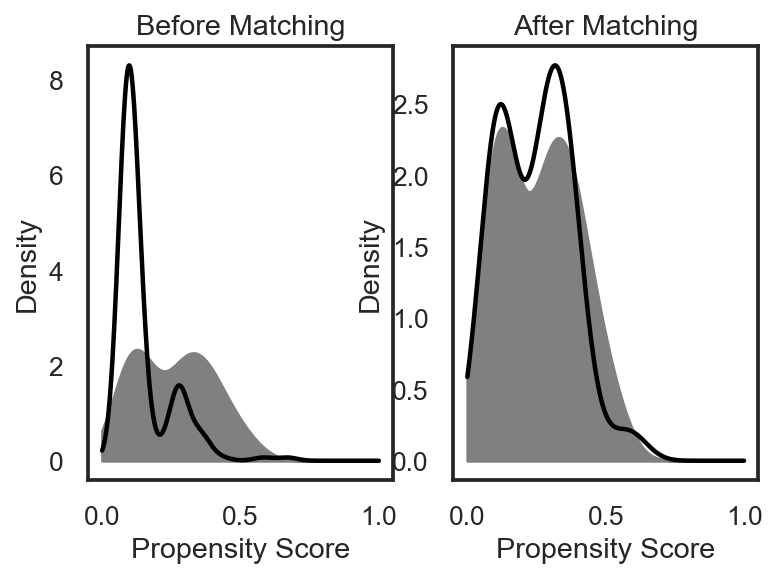

In [147]:
plotScores(PMdata.Groups, PMdata.Propensity, RCCmatch)

In [148]:
df_final.columns

Index(['Gender', 'BMI', 'Smoker', 'Age', 'Race', 'Groups', 'Patient ID'], dtype='object')

### [Go back to notebook content](#0)

# 4. Cohort Characteristics: Post-Matched Groups
<a id="4"></a>

In [149]:
dfsample = df_final['Patient ID']

In [150]:
data = pd.merge(dfsample.to_frame(), combined, on='Patient ID') 
#Only select data for the PS-Matched cohort. 

In [151]:
data.shape

(62, 7145)

### (a) Quantitative Meta Data

_Function for Quantitative Cohort Characteristics_

In [152]:
def cohortQuant(cohortID, dfControl, dfTreat, alpha=0.05, var=True):
    '''
    Function conducts a T-test for the numerical cohort characteristics between two groups
    
    Inputs: 
    cohortID = A list of the numerical cohort characteristics
    dfControl = A pandas dataframe containing the control group cohort data
    dfTreat =  A pandas dataframe containing the treatment group cohort data
    alpha = alpha for statistical significant judgment, Default 0.05
    var = If True (default), perform a standard independent 2 sample test that assumes 
    equal population variances [1]. If False, perform Welch’s t-test, which does not 
    assume equal population variance
    
    Outputs: A pandas dataframe with p-values of numerical cohort characteristics. 
    
    '''
    pvaluelist = []
    commentlist = []
    for conf in cohortID:
        statistic, pvalue = scipy.stats.ttest_ind(dfControl[conf], dfTreat[conf], 
                                              equal_var=var)
        pvaluelist.append(pvalue)
        if pvalue > alpha:
            comment = 'not significant'
        else:
            comment = 'significant'
        commentlist.append(comment)
    ConfTable = pd.DataFrame({'Confounder': cohortID, 
                              'T-test p-value': pvaluelist, 
                              'Comment': commentlist})
    return ConfTable
    

In [153]:
data.Groups.value_counts()

RCC        31
Control    31
Name: Groups, dtype: int64

In [154]:
confounderID = ['Age', 'BMI']
dControl = data[(data['Groups'] == 'Control')]
dRCC = data[(data['Groups'] == 'RCC')]
cohortQuant(confounderID, dControl, dRCC, var=True)

Confounder  T-test p-value          Comment
0        Age        0.753622  not significant
1        BMI        0.050957  not significant

In [155]:
print('CONTROL', dControl.filter(['Age', 'BMI'], axis=1).describe())
print('RCC', dRCC.filter(['Age', 'BMI'], axis=1).describe())

CONTROL              Age        BMI
count  31.000000  31.000000
mean   58.516129  26.364516
std    12.556196   5.010625
min    26.000000  17.500000
25%    51.500000  22.950000
50%    57.000000  25.500000
75%    66.000000  30.650000
max    85.000000  35.400000
RCC              Age        BMI
count  31.000000  31.000000
mean   59.503226  29.106452
std    12.089623   5.800341
min    32.600000  17.400000
25%    55.600000  24.900000
50%    60.200000  29.400000
75%    66.800000  33.050000
max    77.100000  42.100000


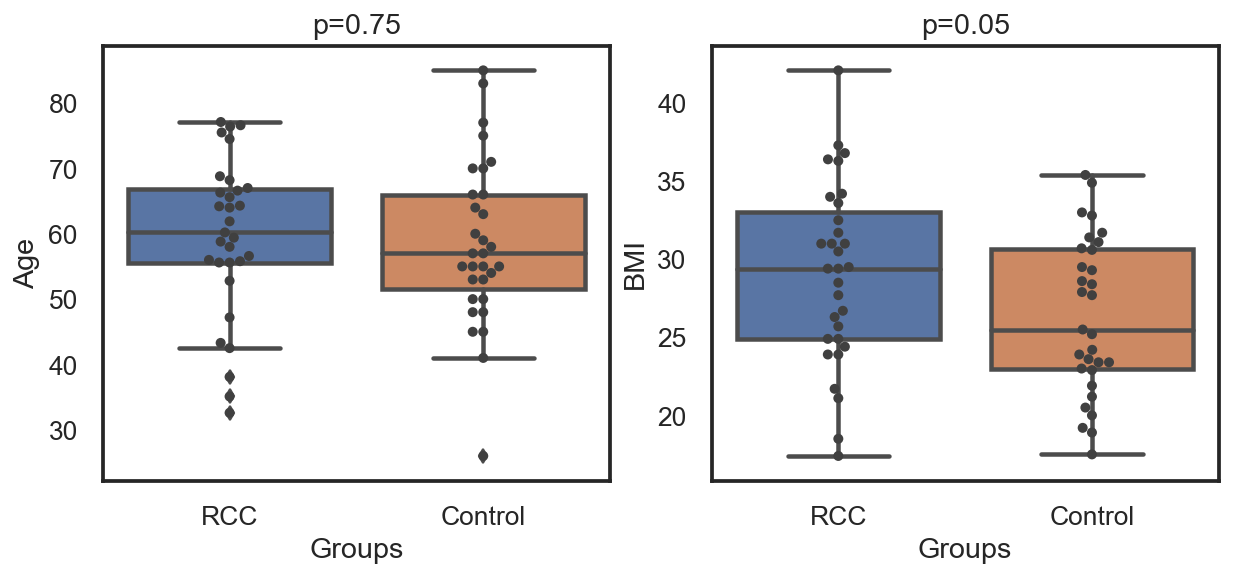

In [156]:
_, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

Age = sns.boxplot(x='Groups', y='Age', data=data, ax=axes[0]);
sns.swarmplot(x='Groups', y='Age', data=data, s =5, alpha=1, color=".25", ax=axes[0])
BMI = sns.boxplot(x='Groups', y='BMI', data=data, ax=axes[1]);
sns.swarmplot(x='Groups', y='BMI', data=data, s =5, alpha=1, color=".25", ax=axes[1])
Age.set_title('p=0.75',loc='center');
BMI.set_title('p=0.05',loc='center');

### (b) Categorical Meta Data

In [157]:
# Recall that Former and Current were treated as one entity in PS matching. 
data['Smoker'].replace({'Current': 'Former/Current', 'Former': 'Former/Current'}, inplace=True);
data['Race'].replace({'Mixed': 'Others', 'Unk/Missing': 'Others'}, inplace=True);

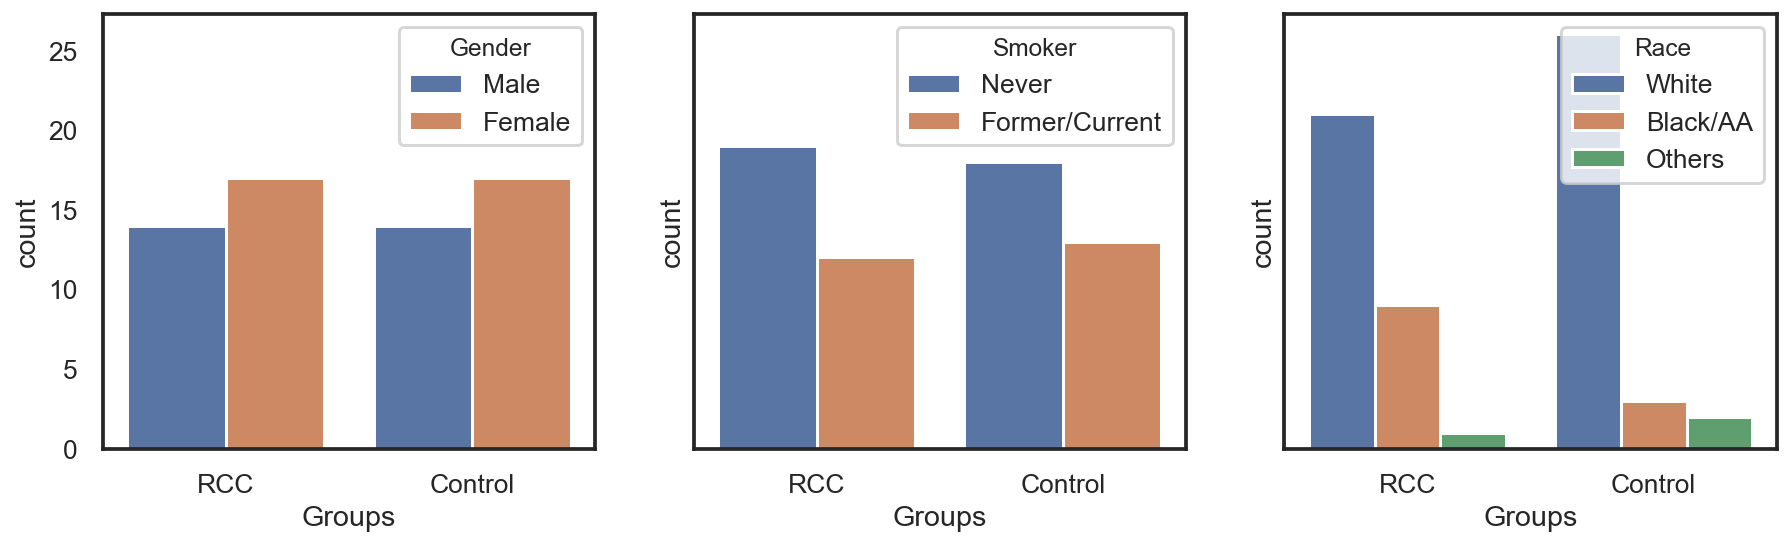

In [158]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))

sns.countplot(x='Groups', hue='Gender', data=data, ax=axes[0]);
sns.countplot(x='Groups', hue='Smoker', data=data, ax=axes[1]);
sns.countplot(x='Groups', hue='Race', data=data, ax=axes[2]);

___Piechart function___

In [159]:
def pieChart(dataframe, tilt_num, explode=False, shadow=False): 
    '''
    DEPENDENCY: matplotlib.pyplot.pie
    
    INPUTS: 
    dataframe = A pandas dataframe with category in the first column and associated data in the second column
    tilt_num = A number that specifies the amount of offset to apply to the wedge corresponding to the dataset 
    on the last row. The purpose of this is to make pie-chart annotation visible in the case of an overlapping 
    annotation. For best results, choose number between 0 and 1.  
    
    explode = Boolean. Set to True to make the tilt_num parameters applicable. 
    
    shadow = Boolean. Set to True for wedge shadows
    
    OUTPUTS: A pie chart figure. 
    
    '''
    if explode==False: 
        plt.pie(
        # using data
        dataframe.iloc[:, 1],
        # labels
        labels=dataframe.iloc[:, 0],
        # with no shadows
        shadow=shadow,
        # with the start angle at 90%
        startangle=90,
        # with the percent listed as a fraction
        autopct='%1.1f%%')
    
        # View the plot drop above
        plt.axis('equal')
        # View the plot
        plt.tight_layout()
        fig = plt.show()
        return fig
    else:
        lst = [0] * dataframe.shape[0] # create a list of length equal to number of pie, sets to zero
        lst[-1] = tilt_num # replace the last digit of lst with the tilt_num
        plt.pie(dataframe.iloc[:, 1], labels=dataframe.iloc[:, 0],
        shadow=shadow, explode=lst, startangle=90, autopct='%1.1f%%')
    
        # View the plot drop above
        plt.axis('equal')
        # View the plot
        plt.tight_layout()
        fig = plt.show()
    return fig

_Gender_

In [160]:
print(dControl['Gender'].value_counts())
print(dControl['Gender'].value_counts(normalize=True)*100)
print(dRCC['Gender'].value_counts())
print(dRCC['Gender'].value_counts(normalize=True)*100)

Female    17
Male      14
Name: Gender, dtype: int64
Female    54.83871
Male      45.16129
Name: Gender, dtype: float64
Female    17
Male      14
Name: Gender, dtype: int64
Female    54.83871
Male      45.16129
Name: Gender, dtype: float64


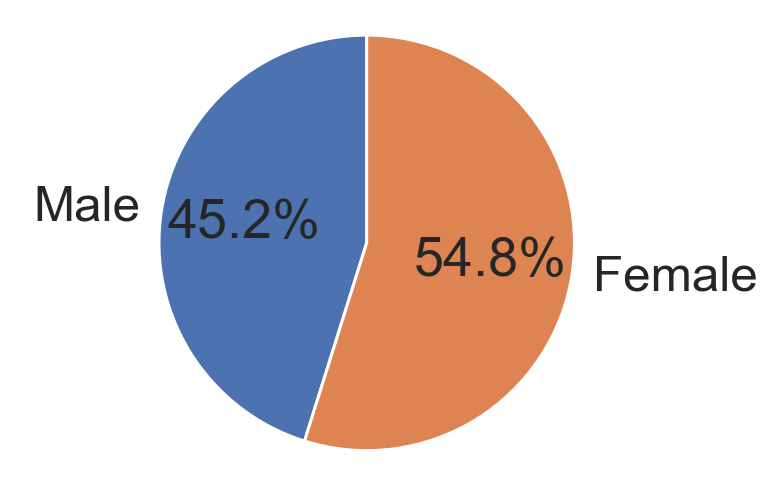

In [161]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=1.5)
raw_data = {'Gender': ['Male', 'Female'], 'Numbers': [14, 17]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)

_Smoking History_

In [162]:
data.Smoker.value_counts()

Never             37
Former/Current    25
Name: Smoker, dtype: int64

In [163]:
dControl = data[(data['Groups'] == 'Control')]
dRCC = data[(data['Groups'] == 'RCC')]
print(dControl['Smoker'].value_counts())
print(dControl['Smoker'].value_counts(normalize=True)*100)
print(dRCC['Smoker'].value_counts())
print(dRCC['Smoker'].value_counts(normalize=True)*100)

Never             18
Former/Current    13
Name: Smoker, dtype: int64
Never             58.064516
Former/Current    41.935484
Name: Smoker, dtype: float64
Never             19
Former/Current    12
Name: Smoker, dtype: int64
Never             61.290323
Former/Current    38.709677
Name: Smoker, dtype: float64


_Smoking History: Healthy Control_

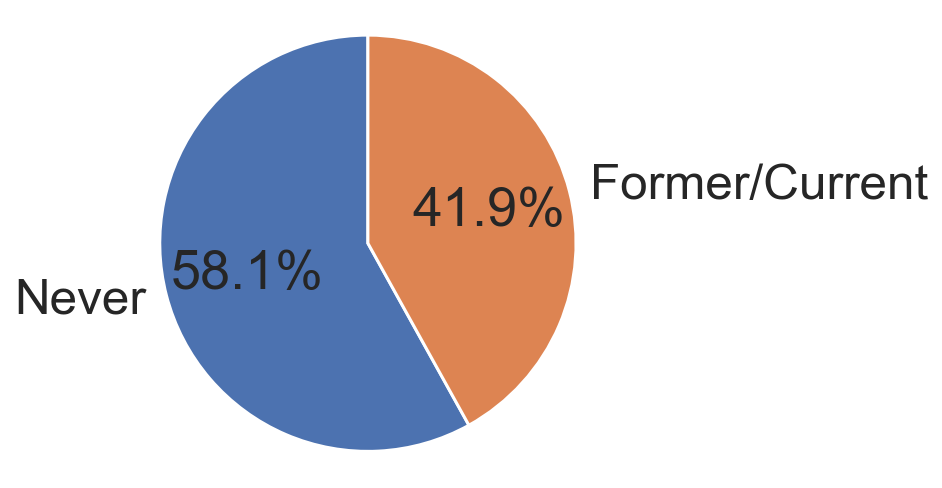

In [164]:
raw_data = {'Smoker': ['Never', 'Former/Current'],
            'Numbers': [18, 13]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)

_Smoking History: RCC_

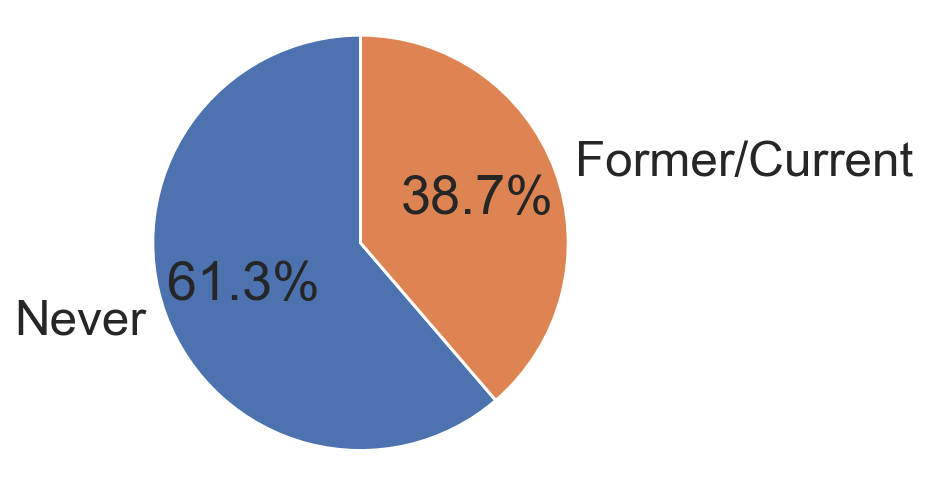

In [165]:
raw_data = {'Smoker': ['Never', 'Former/Current'],
            'Numbers': [19, 12]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)

_Race_

In [166]:
data.Race.value_counts()

White       47
Black/AA    12
Others       3
Name: Race, dtype: int64

In [167]:
dControl = data[(data['Groups'] == 'Control')]
dRCC = data[(data['Groups'] == 'RCC')]
print(dControl['Race'].value_counts())
print(dControl['Race'].value_counts(normalize=True)*100)
print(dRCC['Race'].value_counts())
print(dRCC['Race'].value_counts(normalize=True)*100)

White       26
Black/AA     3
Others       2
Name: Race, dtype: int64
White       83.870968
Black/AA     9.677419
Others       6.451613
Name: Race, dtype: float64
White       21
Black/AA     9
Others       1
Name: Race, dtype: int64
White       67.741935
Black/AA    29.032258
Others       3.225806
Name: Race, dtype: float64


_Control_

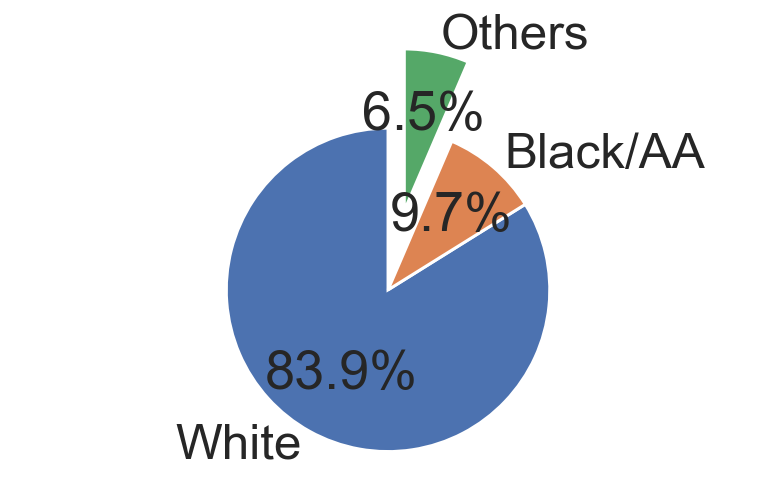

In [168]:
raw_data = {'Race': ['White', 'Black/AA', 'Others'],
            'Numbers': [26, 3, 2]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=True, shadow = False)

_RCC_

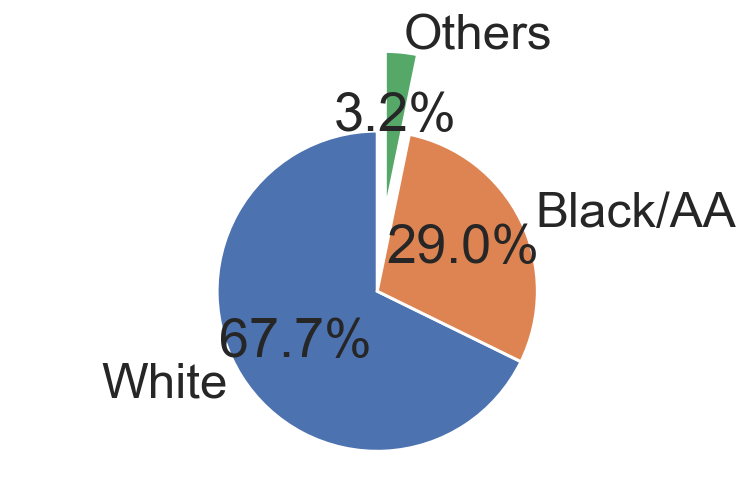

In [169]:
raw_data = {'Race': ['White', 'Black/AA', 'Others'],
            'Numbers': [21, 9, 1]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=True, shadow = False)

In [173]:
modelcohort = pd.merge(dfsample.to_frame(), combined, on='Patient ID') 
print (modelcohort.shape)
modelcohort.head()

(62, 7145)


Patient ID Sample ID            1            2            3        4  \
0      PD104      C049  5.97807e+08  1.81839e+09  5.98711e+06  20947.8   
1      PD046      C019  8.07321e+08  1.48849e+09  1.49582e+09     5385   
2      PD126      C065  1.36129e+07  5.10694e+08  4.93418e+08  41401.6   
3      PD121      C062  1.88765e+07   8.4064e+08  8.29338e+08  47329.9   
4      PD005      C003  7.65629e+08  1.67333e+09  7.47349e+06  8567.13   

             5        6        7        8    ...         unk2      unk3  \
0  4.36444e+08  1785.58   565821  97655.6    ...     0.012582  0.102493   
1      34337.6  7092.31  71372.5   130796    ...     0.011892  0.125865   
2      18949.7  703.692  49702.3   152322    ...     0.009647  0.097486   
3      25594.9  1454.16   661282   949140    ...     0.019877  0.099469   
4      25730.9  3246.46   133905   495502    ...     0.008217  0.129223   

       unk4      unk5      unk6      unk7      unk8      unk9     unk10  \
0  0.121455  0.179482  0.049521  0.234109  0.006182  0.004947  0.014736   
1  0.179585  0.416607  0.051424  0.320539  0.009790  0.002624  0.001285   
2  0.109548  0.109558  0.191093  0.180658  0.008577  0.003919  0.002121   
3  0.139358  0.399522  0.072423  0.197704  0.008083  0.003574  0.004219   
4  0.106857  0.254843  0.060091  0.539889  0.005810  0.003354  0.001337   

      unk11  
0  0.000594  
1  0.001816  
2  0.000666  
3  0.000508  
4  0.001725  

[5 rows x 7145 columns]

Non-metabolic features in the `modelcohort` dataframe include the following: 
-  Sample ID
-  Patient ID
-  Collection
-  Gender
-  Race
-  BMI
-  Smoker
-  Age
-  Groups

### [Go back to notebook content](#0)

# 5. RCC Prediction in Model Cohort
<a id="5"></a>

In [175]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=0.8)
import statsmodels as sms
from statsmodels.stats import multitest
from statistics import mean

# Machine Learning Libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Import Random Forest classifier, sklearn metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# test train split and K-fold validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import decomposition

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# Plotly and Network Graph Libraries
import plotly as py
import plotly.graph_objs as go

import networkx as nx

py.offline.init_notebook_mode(connected=True)

### a. Feature Selection 

#### (i)  Select features with greater than 2-fold changes

Non-metabolic features in the `modelcohort` dataframe include the following: 
-  Sample ID
-  Patient ID
-  Collection
-  Gender
-  Race
-  BMI
-  Smoker
-  Age
-  Groups

In [180]:
NMRMS = modelcohort.drop(['Sample ID', 'Patient ID', 'Collection', 'Gender',
                         'Race', 'BMI', 'Smoker', 'Age'], axis=1)
Control = NMRMS[(NMRMS['Groups'] == 'Control')]
RCC = NMRMS[(NMRMS['Groups'] == 'RCC')]

dfmean = pd.DataFrame({'Features':NMRMS.drop(['Groups'], axis=1).mean(axis=0).index, 
                       'Control':Control.drop(['Groups'], axis=1).mean(axis=0).values,
                       'RCC':RCC.drop(['Groups'], axis=1).mean(axis=0).values})
dfmean.shape

(7136, 3)

In [181]:
cols = []
ctr_val = dfmean['Control']
rcc_val = dfmean['RCC']

for ctr, rcc in zip(ctr_val, rcc_val):
    ratio1 = ctr/rcc
    ratio2 = rcc/ctr
    if ratio1 > 2:
        feature = dfmean[dfmean['Control']==ctr]['Features'].values.tolist()
        cols.append(feature)
    elif ratio2 > 2:
        feature = dfmean[dfmean['Control']==ctr]['Features'].values.tolist()
        cols.append(feature)
xfold_feat = [val for sublist in cols for val in sublist] # flatten out list of list.
len(xfold_feat)

2109

#### (ii) _t_-Test Feature Selection 

_T-Test Function_

In [182]:
def Ttest(metabolites, dfControl, dfTreat, alpha=0.05, var=True):
    '''
    Function conducts a T-test for the metabolites differences between two groups with 
    Benjamini-Hocberg FDR correction
    
    Inputs: 
    metabolites = A list containing names of metabolites
    dfControl = A pandas dataframe containing the control group metabolites data
    dfTreat =  A pandas dataframe containing the treatment group metabolites data
    alpha = alpha for statistical significant judgment, default 0.05
    var = If True (default), perform a standard independent 2 sample test that assumes 
    equal population variances [1]. If False, perform Welch’s t-test, which does not 
    assume equal population variance
    
    Outputs: A pandas dataframe with p-values of numerical cohort characteristics. 
    
    '''
    ttest_dict = {}
    for metabolite in metabolites:
        statistic, pvalue =  scipy.stats.ttest_ind(dfControl[metabolite], 
                                               dfTreat[metabolite], 
                                               equal_var=var)
        ttest_dict[metabolite] = pvalue 
        # a dictionary containing name of metabolites and p value after t-test
    ttest = pd.DataFrame.from_dict(ttest_dict, orient='index') # the dictionary in pandas df
    ttest_list=list(ttest_dict.values()) #values (pvalues) of ttest result in a list
    reject, pval_corrected, _, _ = sms.stats.multitest.multipletests(ttest_list, 
                                                                 alpha=alpha, 
                                                                 method='fdr_bh')
    ttest_results = pd.DataFrame({'Metabolite': metabolites, 'T-test p-value': ttest_list, 
                              'FDR p-value': pval_corrected, 'Reject H0': reject})
    Table = ttest_results.sort_values(by=['FDR p-value'])
    return Table

In [238]:
# '''List of final metabolites set'''
metabolite_list = xfold_feat

# '''List of final metabolites set'''
ttest_result = Ttest(metabolite_list, Control, RCC, alpha=0.05, var=True)

# '''List of Statistically relevant metabolites'''
# Select metabolites with <0.05 FDR
stat_sig = ttest_result.loc[ttest_result['Reject H0'] == True]

# Select metabolites with <0.05 t-test
#stat_sig = ttest_result.loc[ttest_result['T-test p-value'] <= 0.05]
print("The total number of significant metabolites/Features is: ", len(stat_sig))

The total number of significant metabolites/Features is:  473


In [313]:
Feature = stat_sig['Metabolite'].values.tolist(); # stat MS significant metabolites
MLfeatures = NMRMS[Feature] # p<0.05 metabolites
MLfeatures =(MLfeatures - MLfeatures.mean(axis=0))/MLfeatures.std(axis=0) #autoscaling

In [314]:
MLfeatures.shape

(62, 473)

In [321]:
MLfeatures.astype(float);

In [325]:
correlated_features = set()
correlation_matrix = MLfeatures.astype(float).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [327]:
MLfeatures = MLfeatures.drop(correlated_features, axis=1)
MLfeatures.shape

(62, 137)

### b. Recursive Feature Elimination for Feature Selection

In [328]:
dfgrp = NMRMS.filter(['Groups'], axis=1)
# convert strings (RCC, Control) to integers
dfgroup = dfgrp['Groups'].map({'Control': 0, 'RCC': 1}) 
# Features and groups
X = MLfeatures.values
y = dfgroup.values

Optimal number of features : 110


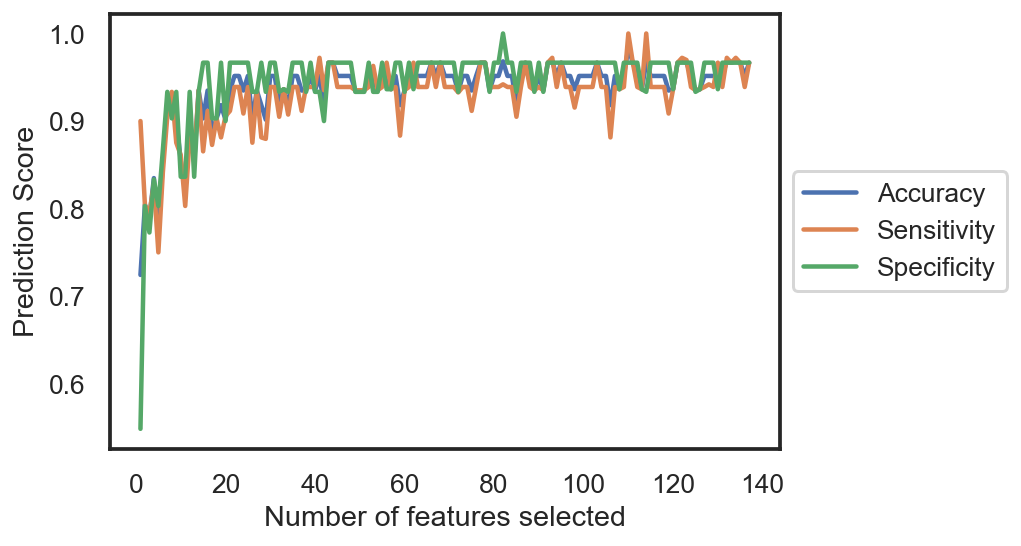

In [329]:
# Create the RFE object and compute a cross-validated score.
#RF= RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, class_weight="balanced",  random_state=42)
RF=RandomForestClassifier(n_estimators=100, random_state=42)

# The "accuracy" scoring is proportional to the number of correct
# classifications
accuracy = RFECV(estimator=RF, scoring='accuracy') #'accuracy'
precision = RFECV(estimator=RF, scoring='precision') #'accuracy'
recall = RFECV(estimator=RF, scoring='recall') #'accuracy'

accuracy.fit(X, y)
precision.fit(X, y)
recall.fit(X,y)

print("Optimal number of features : %d" % accuracy.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Prediction Score")
plt.plot(range(1, len(accuracy.grid_scores_) + 1), 
         accuracy.grid_scores_, label='Accuracy')
plt.plot(range(1, len(precision.grid_scores_) + 1), 
         precision.grid_scores_, label='Sensitivity')
plt.plot(range(1, len(recall.grid_scores_) + 1), 
         recall.grid_scores_, label='Specificity')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [330]:
print ("The highest accuracy features is {}%" .format(max(accuracy.grid_scores_)*100))

The highest accuracy features is 98.33333333333334%


Rank features by the features importance from `RF-RFECV` algorithms. 

In [331]:
list_of_tuples = list(zip(MLfeatures.columns, 
                          accuracy.estimator_.feature_importances_, 
                          accuracy.support_, accuracy.ranking_))
df_feat = pd.DataFrame(list_of_tuples, columns = ['Metabolites', 'Importance', 
                                                  'Selected', 'Ranking'])
df_feat = df_feat.sort_values(by='Importance', ascending=False)
#df_feat = df_feat.loc[df_feat['Ranking'] == True]
df_feat.head()

Metabolites  Importance  Selected  Ranking
67         1214    0.065573     False       20
0          3872    0.057651      True        1
7          6262    0.046361      True        1
4          3804    0.043293      True        1
58         3582    0.040794      True        1

_Select the features with the top 20 RF feature importance score or all features selected by the RFECV-RF_

In order to use the top features with the lowest q-values, use the the `stat_sig` dataframes

In [332]:
MLfeatures = NMRMS[df_feat['Metabolites'][:20].tolist()] # top 20 ML features
#MLfeatures = NMRMS[df_feat['Metabolites'].tolist()] # all selected features from RFECV-RF
MLfeatures =(MLfeatures - MLfeatures.mean(axis=0))/MLfeatures.std(axis=0) #autoscaling

### c. Machine Learning for RCC Prediction

_Machine Learning Model Function_

In [333]:
def ml_model(X, y, model, kfold=5):
    
    '''
    FUNCTION: 
    A  machine learning function under Kfold cross validation conditions  
    
    DEPENDENCY: 
    Various Sklearn packages
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import roc_auc_score
    
    INPUTS: 
    X = numpy.ndaarray: features
    y = numpy.ndaarray: Labels encoded as 0s and 1s. 
    model = machine learning model
    kfold = numeric. K-fold default is 5. 
    
    OUTPUT: 
    A list containing the following machine learning metrics: 
    Area Under the Curve(AUC), Accuracy (ACC), Precision (PRE), 
    Recall (REC), F1-core (FS), Matthew's Correlation Coefficient (MCC). 
    
    '''

    
    cv = KFold(n_splits=kfold, random_state=123, shuffle=True)
    AUC, ACC, PRE, REC, FS, MCC = [], [], [], [], [], [] # define 'list' of various metrics
    performance = []
    
    for (train, test), i in zip(cv.split(X, y), range(kfold)):
        # training the model
        model.fit(X[train], y[train])
        y_pred = model.predict(X[test])
        
        #Retrieving metrics after testing
        modelprobs = model.predict_proba(X[test])
        fpr, tpr, thresholds = metrics.roc_curve(y[test], modelprobs[:,1])
        roc_auc = auc(fpr, tpr)
        accuracy = metrics.accuracy_score(y[test], y_pred)
        precision = metrics.precision_score(y[test], y_pred)
        recall = metrics.recall_score(y[test], y_pred)
        f1_score = metrics.f1_score(y[test], y_pred)
        mcc = metrics.matthews_corrcoef(y[test], y_pred)
        # append metrics to list
        AUC.append(roc_auc)
        ACC.append(accuracy)
        PRE.append(precision)
        REC.append(recall)
        FS.append(f1_score)
        MCC.append(mcc)
    return AUC, ACC, PRE, REC, FS, MCC

_Machine Learning Metric Plot Function_

In [334]:
def MLmetric_plot(data_dict, y_label):
    '''
    FUNCTION: 
    To plot machine learning metrics from ml_model function.   
    
    DEPENDENCY: 
    Pandas, seaborn, 
    
    INPUTS: 
    data_dict = dictionary. Contains ML model name and metric scores
    y_label = String. Label for the y-axis 
    
    OUTPUT: 
    Figure
    
    '''
    
    fig = pd.DataFrame(data=data_dict)
    splot = sns.barplot(x='Model', y=y_label, data=fig);
    #splot = sns.swarmplot(data=ACCfig, orient='h', s=10, alpha=0.7, color=".25");
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), 
                              (p.get_x() + p.get_width() / 2., p.get_height()), 
                              ha = 'center', va = 'center', xytext = (6, 15), 
                              textcoords = 'offset points')
    return splot
#plt.savefig('testACC.svg', dpi=300)



Define features and labels.

In [346]:
dfgrp = NMRMS.filter(['Groups'], axis=1)
#convert strings (RCC, Control) to integers
dfgroup = dfgrp['Groups'].map({'Control': 0, 'RCC': 1}) 
X = MLfeatures.values
y = dfgroup.values

### Grid Search: Random Forest

[Method Reference](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [347]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [348]:
# Fit the grid search to the data
grid_search.fit(X, y)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.6min finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

### Train Machine Learning Models.

In [349]:
# Random Forest
RF=RandomForestClassifier(n_estimators=100, random_state=123)
#RF=RandomForestClassifier(n_estimators=100, min_samples_split=8,
#                          min_samples_leaf=3, max_features=2, max_depth=90, 
#                          bootstrap=True, random_state=123)
metric = ml_model(X, y, RF)
RF_AUC, RF_ACC, RF_PRE, RF_REC, RF_FS, RF_MCC = metric[0], metric[1], metric[2], metric[3], metric[4], metric[5]
# SVM
clf = svm.SVC(kernel='linear', probability=True)
metric = ml_model(X, y, clf)
clf_AUC, clf_ACC, clf_PRE, clf_REC, clf_FS, clf_MCC = metric[0], metric[1], metric[2], metric[3], metric[4], metric[5]
# Bagging
BAG=BaggingClassifier(n_estimators=100, random_state=123)
metric = ml_model(X, y, BAG)
BAG_AUC, BAG_ACC, BAG_PRE, BAG_REC, BAG_FS, BAG_MCC = metric[0], metric[1], metric[2], metric[3], metric[4], metric[5]
# KNN
knn = KNeighborsClassifier(n_neighbors=7)
metric = ml_model(X, y, knn)
KNN_AUC, KNN_ACC, KNN_PRE, KNN_REC, KNN_FS, KNN_MCC = metric[0], metric[1], metric[2], metric[3], metric[4], metric[5]
# Gradient Boosting
GBC=GradientBoostingClassifier(n_estimators=100, random_state=123)
metric = ml_model(X, y, GBC)
GBC_AUC, GBC_ACC, GBC_PRE, GBC_REC, GBC_FS, GBC_MCC = metric[0], metric[1], metric[2], metric[3], metric[4], metric[5]

**AUC**

In [350]:
sns.set_context('talk', font_scale=0.8)

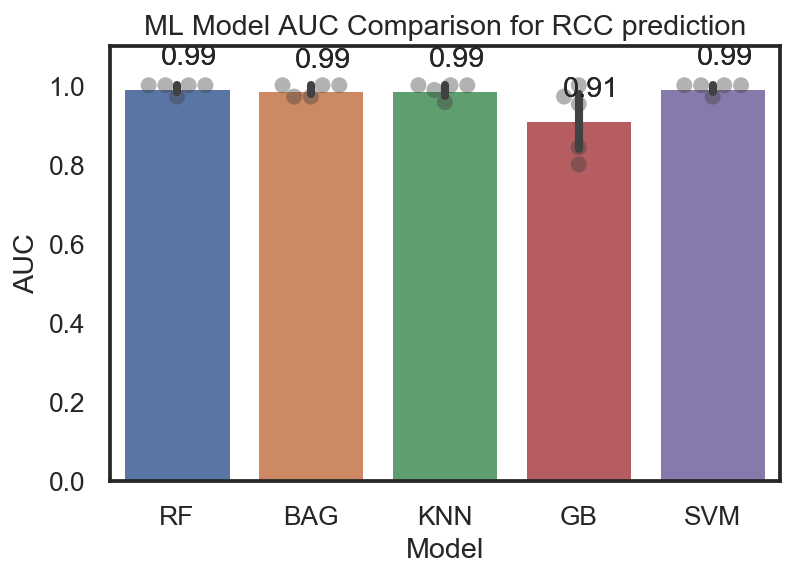

In [351]:
AUCfig = {'Model': ['RF', 'BAG', 'KNN', 'GB', 'SVM'], 
               'AUC':[mean(RF_AUC), mean(BAG_AUC), 
                           mean(KNN_AUC), mean(GBC_AUC), mean(clf_AUC)]}

afig = {'RF': RF_AUC, 'BAG': BAG_AUC, 'KNN': KNN_AUC, 'GB': GBC_AUC, 'SVM': clf_AUC}
bafig = pd.DataFrame(afig)
sns.barplot(data=bafig)
sns.swarmplot(data=bafig,s=8, alpha=0.4, color=".25")
plt.ylim(0,1.1)

MLmetric_plot(AUCfig, 'AUC');
plt.title('ML Model AUC Comparison for RCC prediction');

**Accuracy**

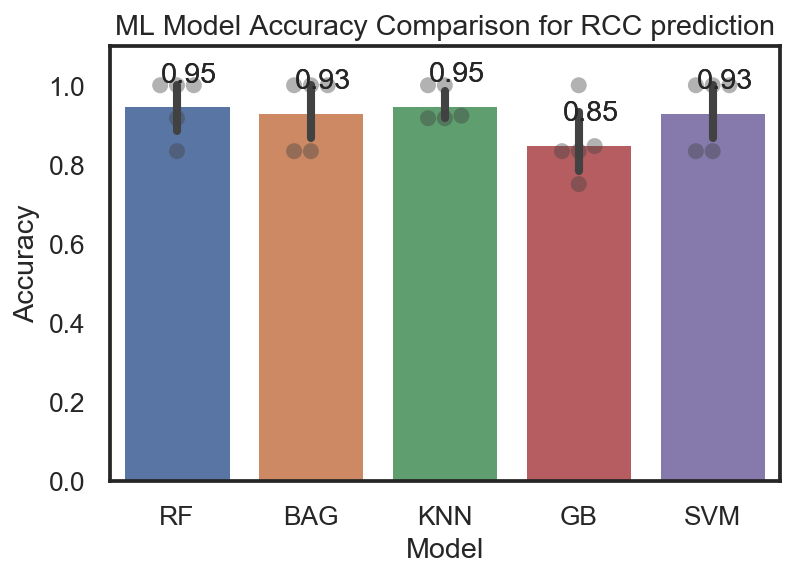

In [352]:
ACC_fig = {'Model': ['RF', 'BAG', 'KNN', 'GB', 'SVM'], 
               'Accuracy':[mean(RF_ACC), mean(BAG_ACC), 
                           mean(KNN_ACC), mean(GBC_ACC), mean(clf_ACC)]}

afig = {'RF': RF_ACC, 'BAG': BAG_ACC, 'KNN': KNN_ACC, 'GB': GBC_ACC, 'SVM': clf_ACC}
bafig = pd.DataFrame(afig)
sns.barplot(data=bafig)
sns.swarmplot(data=bafig,s=8, alpha=0.4, color=".25")
plt.ylim(0,1.1)

MLmetric_plot(ACC_fig, 'Accuracy');
plt.title('ML Model Accuracy Comparison for RCC prediction');

**Precision**

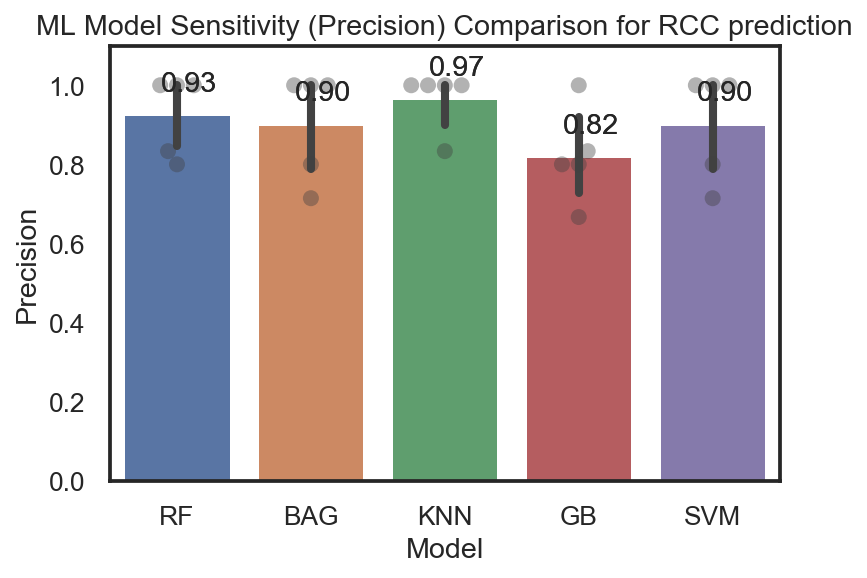

In [353]:
PREfig = {'Model': ['RF', 'BAG', 'KNN', 'GB', 'SVM'], 
               'Precision':[mean(RF_PRE), mean(BAG_PRE), 
                           mean(KNN_PRE), mean(GBC_PRE), mean(clf_PRE)]}

afig = {'RF': RF_PRE, 'BAG': BAG_PRE, 'KNN': KNN_PRE, 'GB': GBC_PRE, 'SVM': clf_PRE}
bafig = pd.DataFrame(afig)
sns.barplot(data=bafig)
sns.swarmplot(data=bafig,s=8, alpha=0.4, color=".25")
plt.ylim(0,1.1)

MLmetric_plot(PREfig, 'Precision');
plt.title('ML Model Sensitivity (Precision) Comparison for RCC prediction');

**Recall**

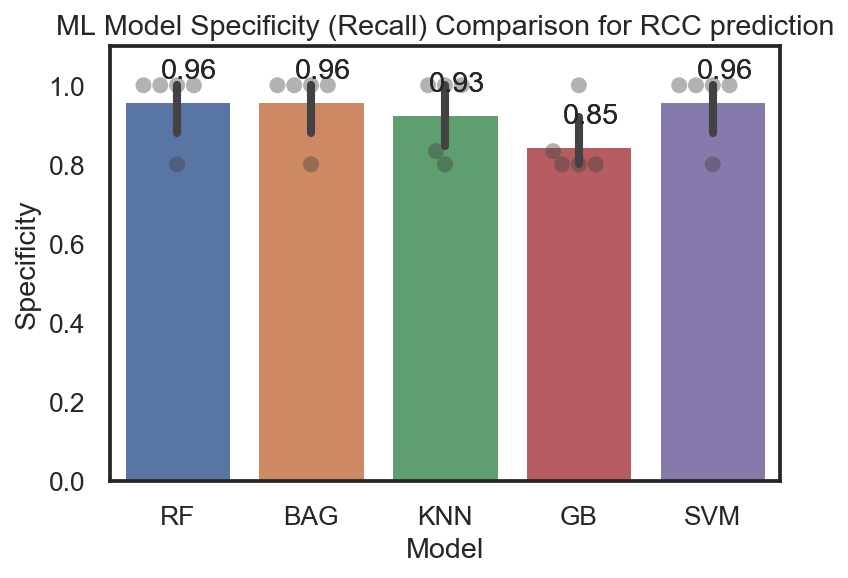

In [354]:
RECfig = {'Model': ['RF', 'BAG', 'KNN', 'GB', 'SVM'], 
               'Specificity':[mean(RF_REC), mean(BAG_REC), 
                           mean(KNN_REC), mean(GBC_REC), mean(clf_REC)]}

afig = {'RF': RF_REC, 'BAG': BAG_REC, 'KNN': KNN_REC, 'GB': GBC_REC, 'SVM': clf_REC}
bafig = pd.DataFrame(afig)
sns.barplot(data=bafig)
sns.swarmplot(data=bafig,s=8, alpha=0.4, color=".25")
plt.ylim(0,1.1)

MLmetric_plot(RECfig, 'Specificity');
plt.title('ML Model Specificity (Recall) Comparison for RCC prediction');

In [344]:
MLfeatures.columns

Index([1214, 3872, 6262, 3804, 3582, 1961, 6680, 4080, 2102, 3141, 1481, 6261,
        363, 6956, 6095, 1691, 5106, 5470, 2240, 3208],
      dtype='object')

### Chemical Information of the Biomarkers

In [359]:
MS_labels[MS_labels.ID.isin(MLfeatures.columns)]

ID      Mode RT [min]                               Name  \
362    363  positive    1.903                                363   
1213  1214  positive    1.242                               1214   
1480  1481  positive     6.29                               1481   
1690  1691  positive    3.418                               1691   
1960  1961  positive    2.434                               1961   
2101  2102  positive    3.449  N,N-Diisopropylethylamine (DIPEA)   
2239  2240  positive    2.886                               2240   
3140  3141  positive    1.133                               3141   
3207  3208  positive    1.098                               3208   
3581  3582  positive    1.214                               3582   
3803  3804  positive    2.595                               3804   
3871  3872  positive    4.049                               3872   
4079  4080  positive    0.821                               4080   
5105  5106  negative    3.534                               5106   
5469  5470  negative    3.902                   Sulfurol acetate   
6094  6095  negative    1.118                  1D-chiro-inositol   
6260  6261  negative    2.591                               6261   
6261  6262  negative    2.667                               6262   
6679  6680  negative    2.687                               6680   
6955  6956  negative    2.715                               6956   

                 Formula  
362                  NaN  
1213         C4 H4 N4 O2  
1480                 NaN  
1690                 NaN  
1960                 NaN  
2101            C8 H19 N  
2239       C11 H27 O7 P3  
3140      C7 H18 N8 O6 S  
3207    C4 H14 N5 O3 P S  
3581                 NaN  
3803       C4 H12 N O6 P  
3871                 NaN  
4079  C10 H21 N3 O8 P2 S  
5105  C18 H38 N9 O18 P S  
5469       C8 H11 N O2 S  
6094           C6 H12 O6  
6260      C9 H18 N9 O2 P  
6261     C10 H20 N9 O5 P  
6679      C4 H12 N5 O4 P  
6955                 NaN

In [360]:
feature_imp = pd.Series(RF.feature_importances_,
                        index=MLfeatures.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


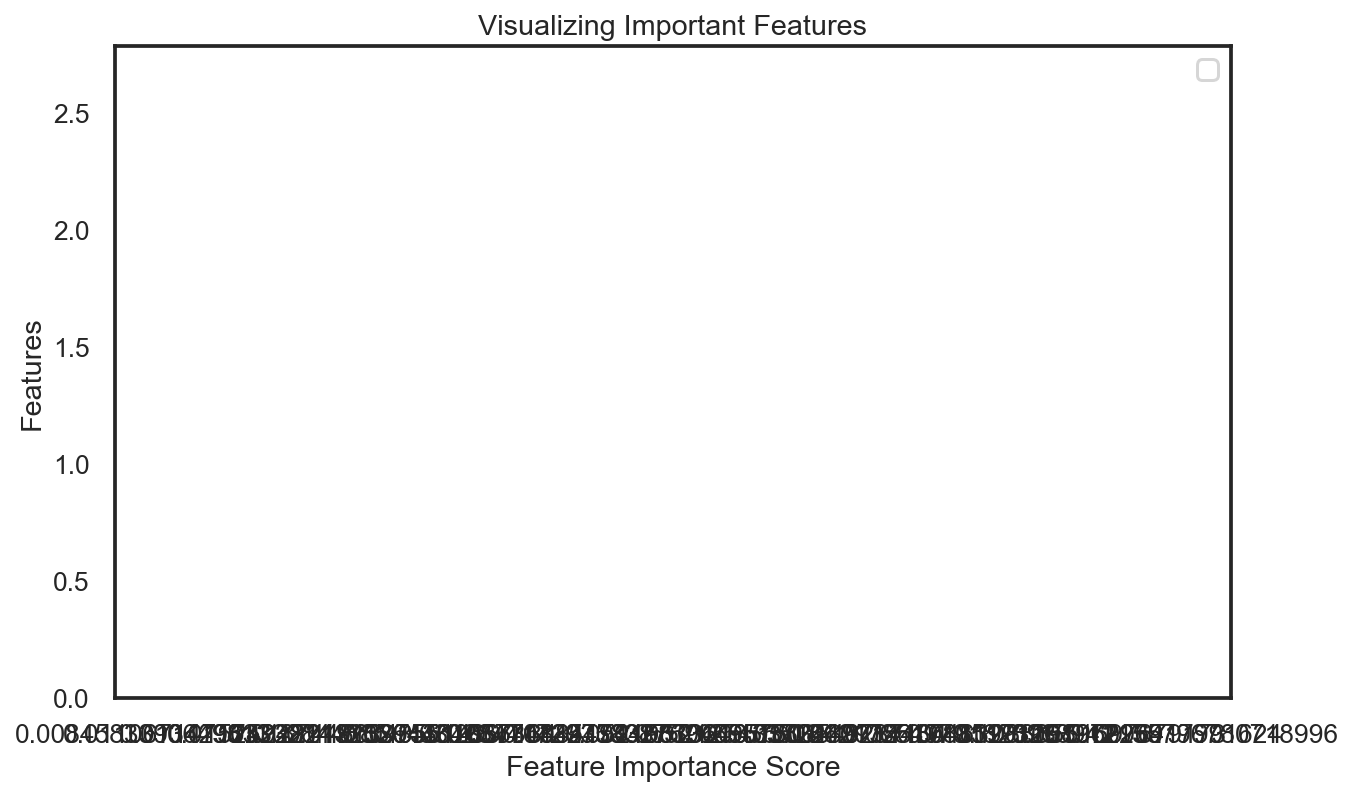

In [363]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
#plt.savefig('RF_Features.svg', dpi=300)
plt.show()

### d. Potential Biomarkers: PCA, HCA, Boxplot Visualization

In [373]:
#biomarker_feat = dummydf[df_feat['Metabolites']]
#biomarker_feat =(biomarker_feat - biomarker_feat.mean(axis=0))/biomarker_feat.std(axis=0)
group_loc = modelcohort.columns.get_loc("Groups") #autoscaling
biomarker =  modelcohort.iloc[:, group_loc].to_frame().join(MLfeatures)

_Rename column in biomarker dataframe to reduce length of feature name_

In [374]:
biomarker.rename(columns={'4-(2-Aminoethyl)benzenesulfonylfluoride':'AEBSF',
                          'N,N-Diisopropylethylamine (DIPEA)':'DIPEA',
                          '2-Aminoacetophenone;O-Acetylaniline':'O-Acetylaniline'}, 
                 inplace=True)

#### Boxplot

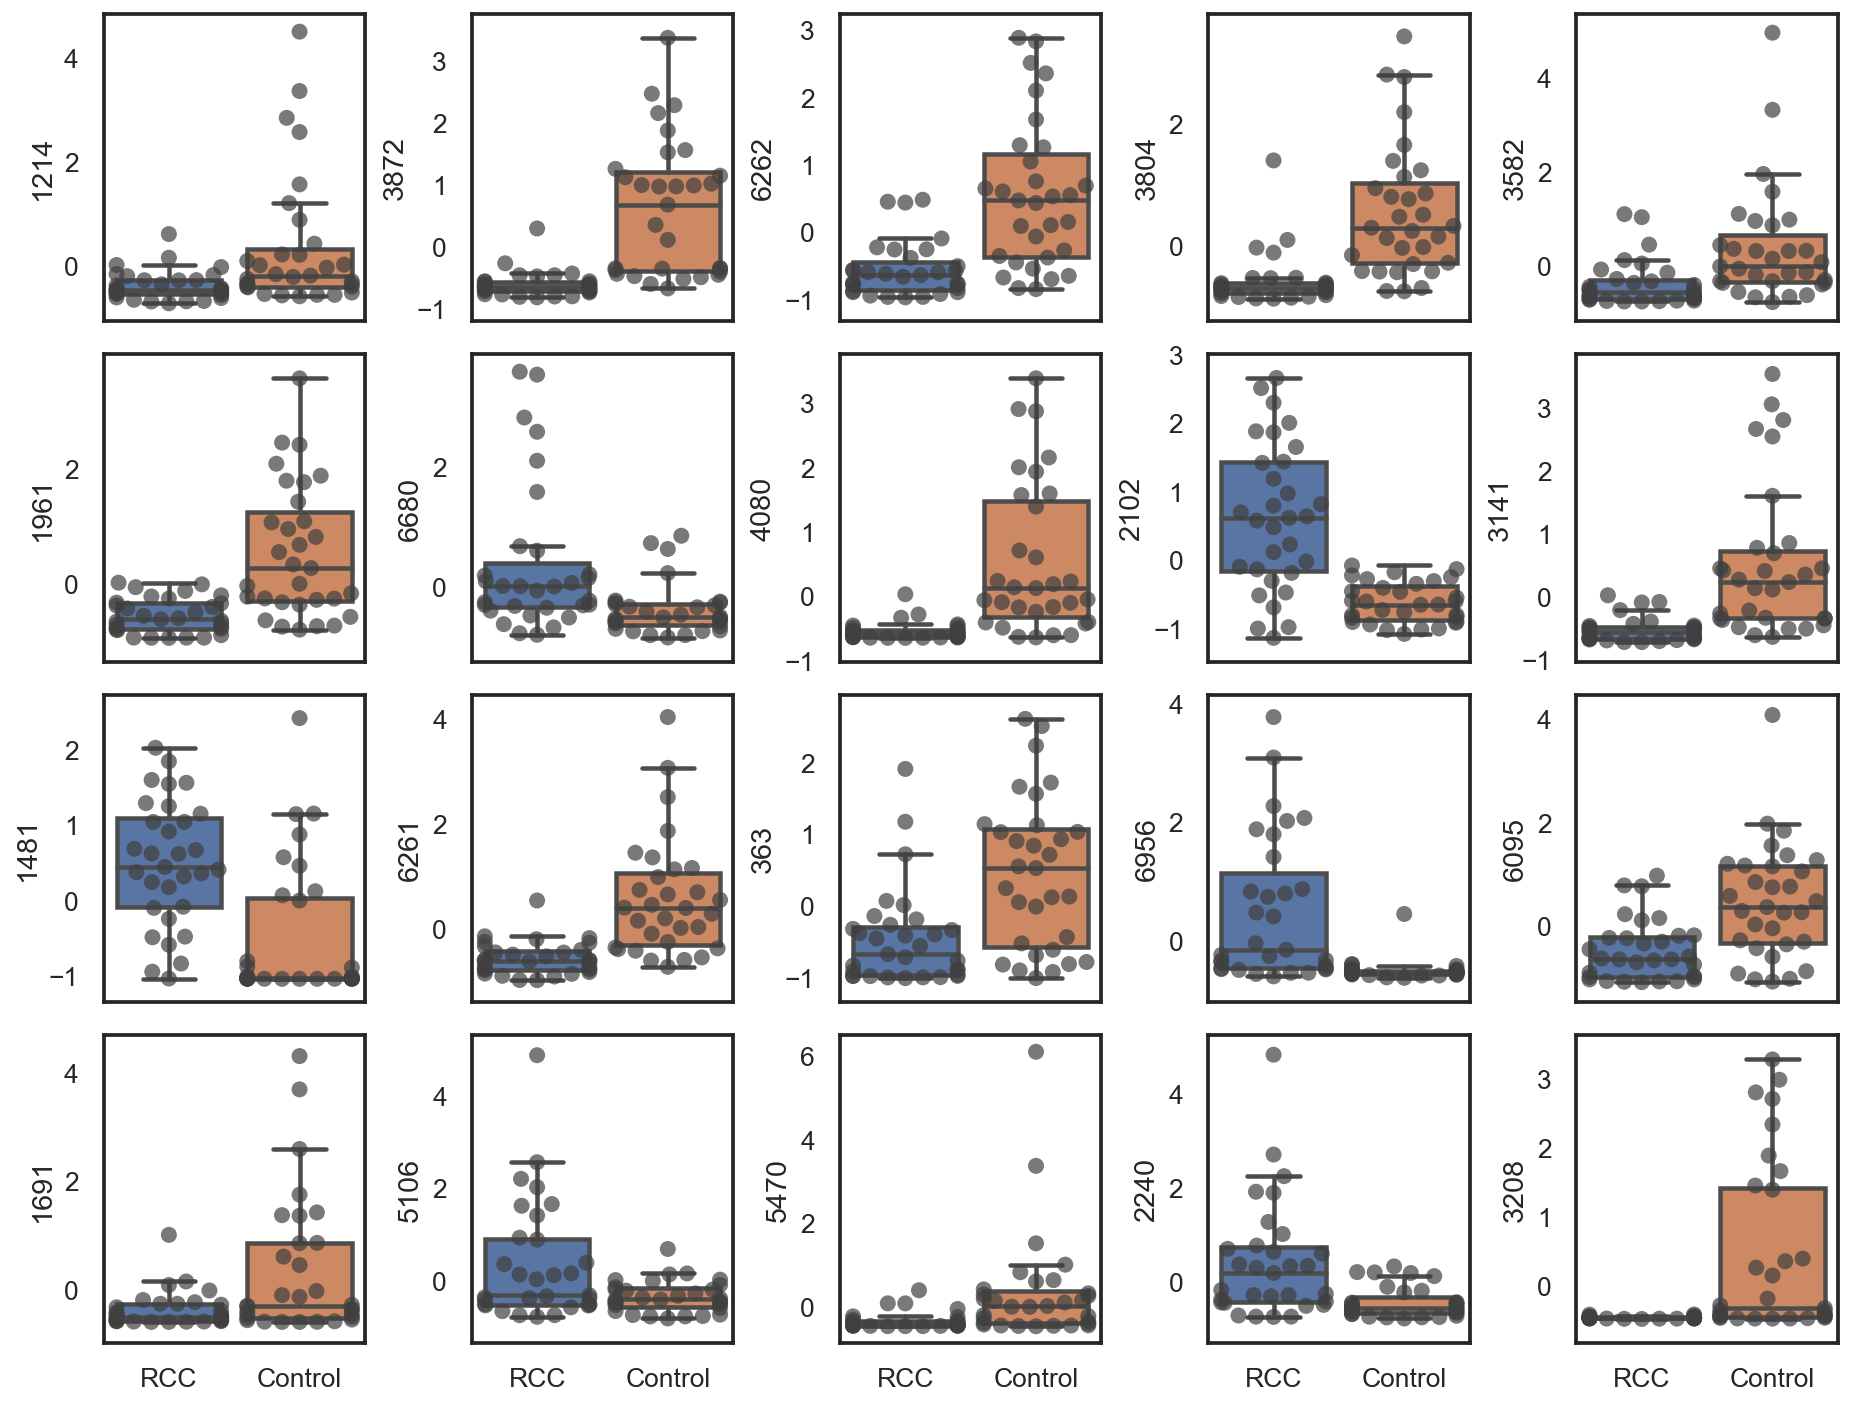

In [502]:
# Metabolites Quantification via boxplot or barplot
fig, axes = plt.subplots(nrows=4, ncols=5, sharex=True, figsize=(13, 10))
for idx, feat in enumerate(biomarker.columns[1:]):
    ax = axes[int(idx / 5), idx % 5]
    sns.boxplot(x='Groups', y=feat, data=biomarker, 
                ax=ax, showfliers=False)
    #sns.barplot (x='Groups', y=feat, data=df, ax=ax, capsize=.06)
    sns.swarmplot(x='Groups', y=feat, data=biomarker, 
                  ax=ax, s=8, alpha=0.7, color=".25");
    ax.set_xlabel('')
    ax.set_ylabel(feat) #feat
fig.tight_layout();
#plt.savefig('AUCplots.svg', dpi=300)

#### PCA

In [376]:
def PCA_Python(X, y, scaled=True):
    '''
    FUNCTION:  
    A principle component analysis function
    Note that number of component to be picked is fixed at 2 and scaling is pareto. 
    **Edit function to make this flexible** 
    
    DEPENDENCY: sklearn
    from sklearn import decomposition
    
    INPUT: Pandas dataframe
    X: Data. Numerical.
    y: Groups
    scaled: Boolean. Default=True
   
    
    OUTPUT: figure
    A PCA score plot
    
    '''
    pca = decomposition.PCA(n_components=2)
    if scaled == True: 
        X_centered = (X - X.mean(axis=0))/np.sqrt(X.std(axis=0)) # pareto scaling.
        #X_centered =(X - X.mean(axis=0))/X.std(axis=0) #autoscaling
    elif scaled == False:
        X_centered = X
    
    pca.fit(X_centered)
    X_pca = pca.transform(X_centered)
    Var = pca.explained_variance_ratio_ # returns variance ratio of the selected component. 
    a = plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Control');
    b = plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'ro', label='RCC');
    c = plt.xlabel("PC1: " + str(round(Var[0]*100, 2)) + "%");
    d = plt.ylabel("PC2: " + str(round(Var[1]*100, 2))+ "%");
    e = plt.legend(loc=0);
    return (a, b, c, d, e)

PCA score plots using all ML features

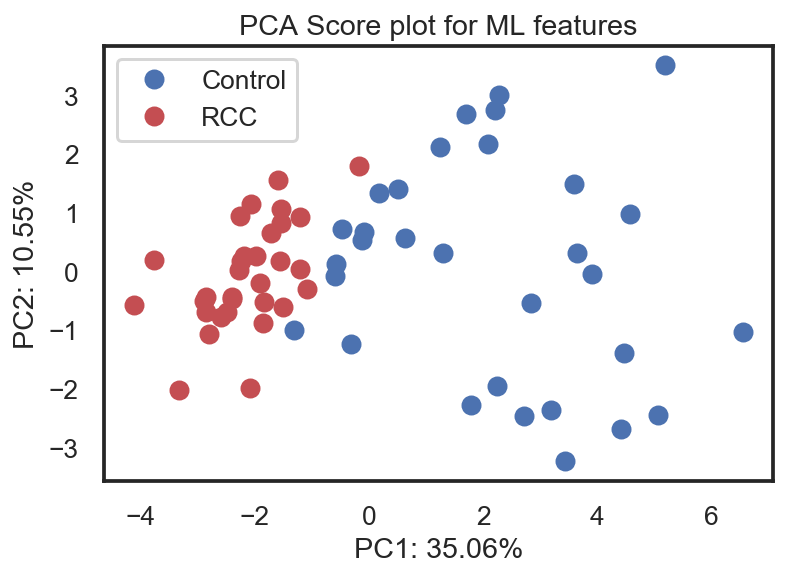

In [377]:
ylabel = biomarker['Groups'].map({'Control' : 0, 'RCC' : 1})
PCA_Python(MLfeatures, ylabel, False)
plt.title('PCA Score plot for ML features');

Create a pandas dataframe for Random Forest feat importance in order to sort for top five discriminatory metabolites. 

In [378]:
list_of_tup = list(zip(MLfeatures.columns, RF.feature_importances_))
feat_imp = pd.DataFrame(list_of_tup, columns = ['Metabolites', 'Importance'])
feat_imp.sort_values(by=['Importance'])

# Select top metabolites as top features
MLfeatures_top = feat_imp['Metabolites'][:5].tolist()

PCA score plots using top ML features

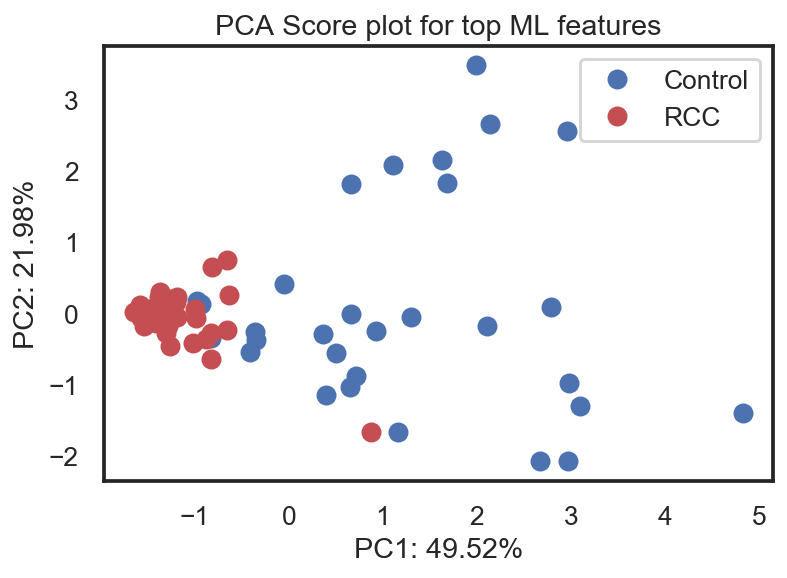

In [380]:
PCA_Python(MLfeatures[MLfeatures_top], ylabel, False);
plt.title('PCA Score plot for top ML features');

**Hierarchial Clustering using all ML features**

In [414]:
group_loc = modelcohort.columns.get_loc("Groups") #autoscaling
biomarker =  modelcohort.iloc[:, group_loc].to_frame().join(MLfeatures)

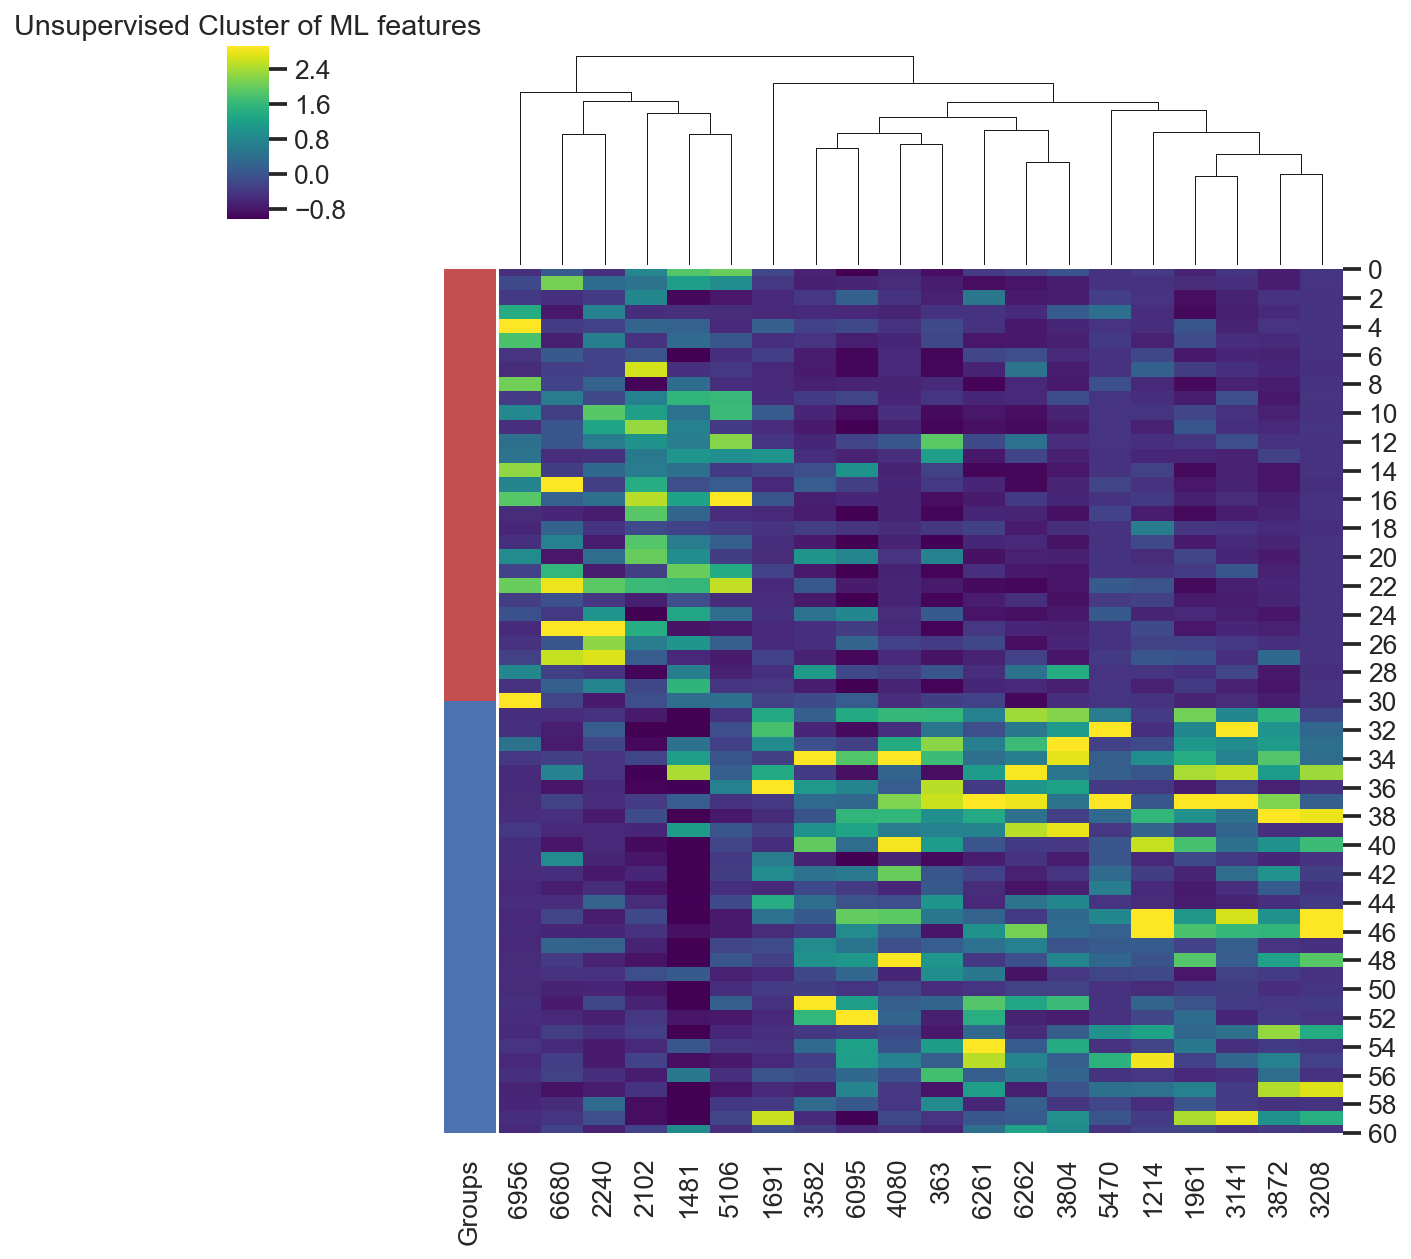

In [415]:
groups_two = biomarker.pop('Groups')
biomarker = biomarker.astype(float)
lut = dict(zip(groups_two.unique(), 'rbg'))
row_colors = groups_two.map(lut)
sns.clustermap(biomarker, method="weighted", 
                   metric='euclidean', cmap="viridis", row_cluster=False, 
                   row_colors=row_colors, robust=True);
plt.title('Unsupervised Cluster of ML features');
# define biomarker dataframe again because of the .pop method
biomarker =  modelcohort.iloc[:, group_loc].to_frame().join(MLfeatures)

**Hierarchial Clustering using features with _q_ value < 0.05**

In [420]:
Feature = stat_sig['Metabolite'].values.tolist(); # stat MS significant metabolites
qfeatures = NMRMS[Feature] # p<0.05 metabolites
qfeatures =(qfeatures - qfeatures.mean(axis=0))/qfeatures.std(axis=0) #autoscaling
group_loc = modelcohort.columns.get_loc("Groups") #autoscaling
qmarker = modelcohort.iloc[:, group_loc].to_frame().join(qfeatures)

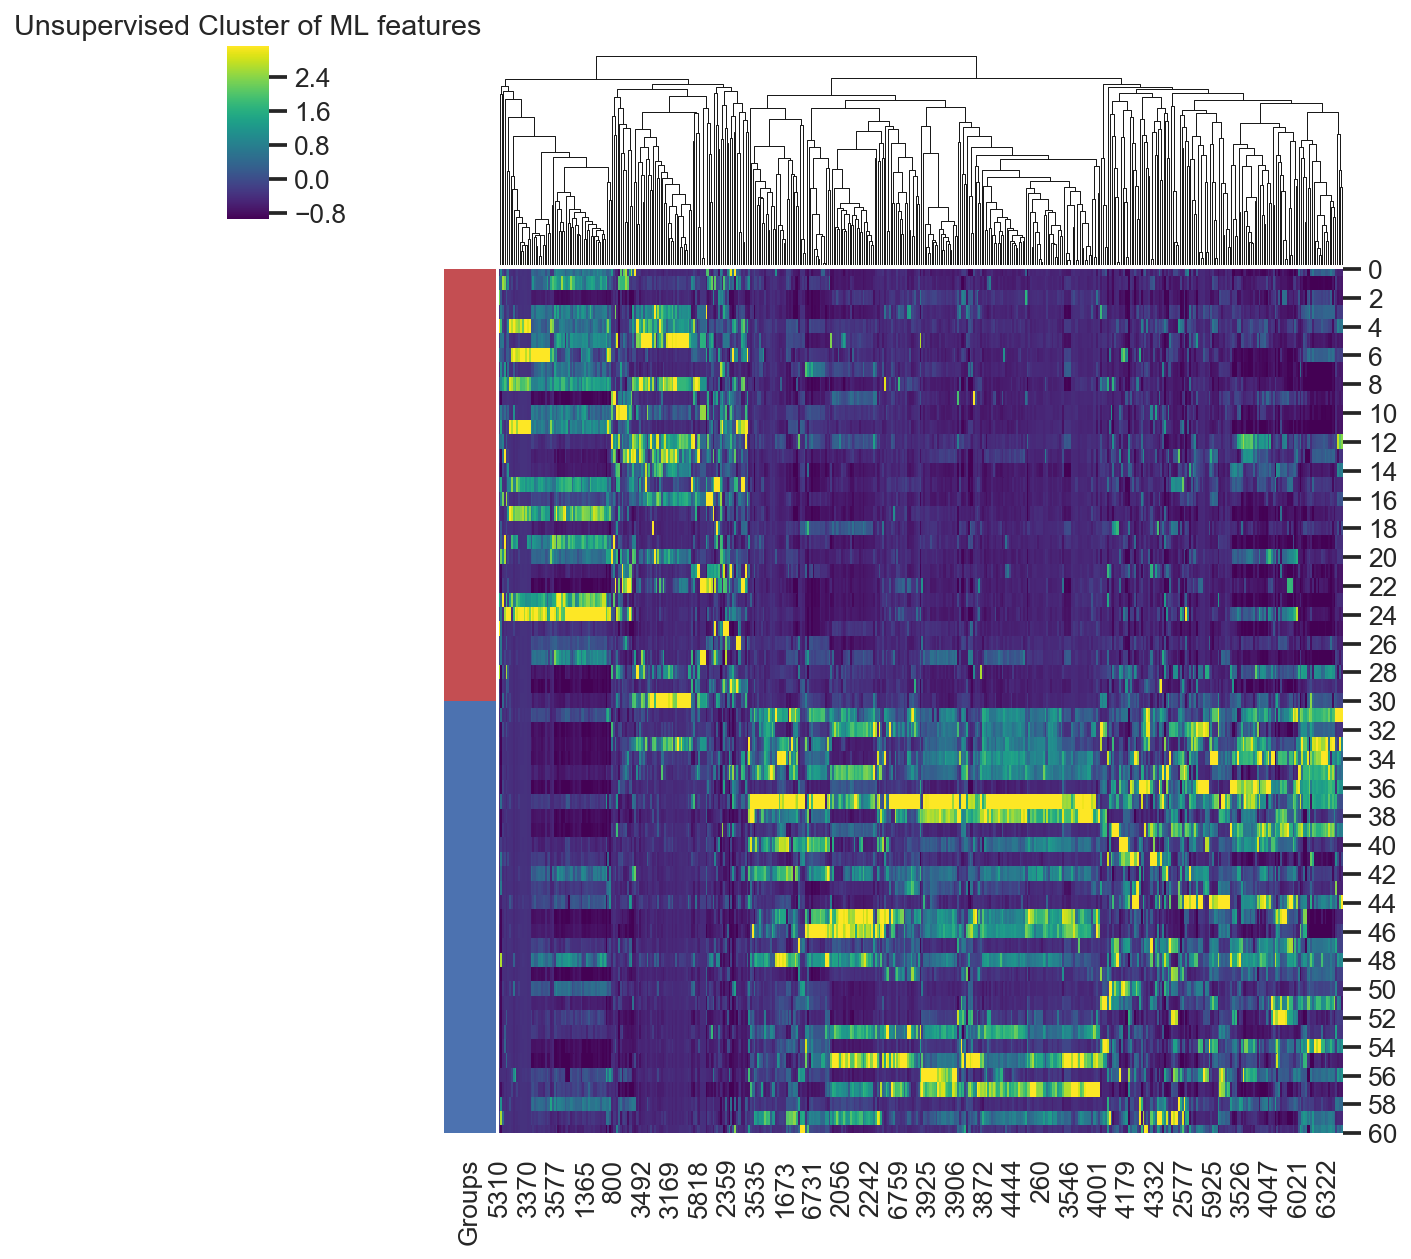

In [421]:
groups_two = qmarker.pop('Groups')
qmarker = qmarker.astype(float)
lut = dict(zip(groups_two.unique(), 'rbg'))
row_colors = groups_two.map(lut)
sns.clustermap(qmarker, method="weighted", 
                   metric='euclidean', cmap="viridis", row_cluster=False, 
                   row_colors=row_colors, robust=True);
plt.title('Unsupervised Cluster of ML features');
# define biomarker dataframe again because of the .pop method
qmarker = modelcohort.iloc[:, group_loc].to_frame().join(qfeatures)

### [Go back to notebook content](#0)

# 6. Cohort Characteristics: Test Cohort
<a id="6"></a>

In [491]:
modelcohort['Groups'].value_counts()

RCC        31
Control    31
Name: Groups, dtype: int64

Non-metabolic features in the `modelcohort` and `combined` dataframe include the following: 
-  Sample ID
-  Patient ID
-  Collection
-  Gender
-  Race
-  BMI
-  Smoker
-  Age
-  Groups

_The complement of the two dataframe_ <br>
`combined` - `modelcohort` = `testcohort`

In [427]:
testcohort = combined.merge(modelcohort, how = 'outer', indicator=True).loc[lambda x : x['_merge']=='left_only']
 
testcohort['Groups'].value_counts()

Control    143
RCC         51
Name: Groups, dtype: int64

In [520]:
data2 = testcohort.filter(["Patient ID", "Gender", "BMI", "Smoker", 
                                 "Age", "Race", "Groups"])
data2.head()

Patient ID  Gender   BMI  Smoker   Age   Race Groups
1      PD003    Male  30.6   Never  64.9  White    RCC
3      PD012    Male  24.7   Never  84.8  White    RCC
4      PD014    Male  32.2  Former  55.7  White    RCC
5      PD015    Male  27.8   Never  59.0  White    RCC
6      PD022  Female  32.2   Never  44.7  White    RCC

In [521]:
data2.Groups.value_counts()

Control    143
RCC         51
Name: Groups, dtype: int64

#### Quantitative Meta Data

In [522]:
confounderID = ['Age', 'BMI']
dControl = data2[(data2['Groups'] == 'Control')]
dRCC = data2[(data2['Groups'] == 'RCC')]
cohortQuant(confounderID, dControl, dRCC, var=False) # Welch t-test. 

Confounder  T-test p-value      Comment
0        Age        0.000195  significant
1        BMI        0.033946  significant

In [523]:
print('CONTROL', dControl.filter(['Age', 'BMI'], axis=1).describe())
print('RCC', dRCC.filter(['Age', 'BMI'], axis=1).describe())

CONTROL               Age         BMI
count  143.000000  143.000000
mean    53.566434   27.532168
std      9.601613    4.399385
min     22.000000   19.800000
25%     47.000000   24.750000
50%     53.000000   26.900000
75%     59.000000   29.950000
max     83.000000   46.600000
RCC              Age        BMI
count  51.000000  51.000000
mean   61.752941  29.425490
std    13.689256   5.676472
min    30.200000  15.700000
25%    54.400000  25.000000
50%    61.600000  30.000000
75%    72.400000  31.900000
max    84.800000  45.000000


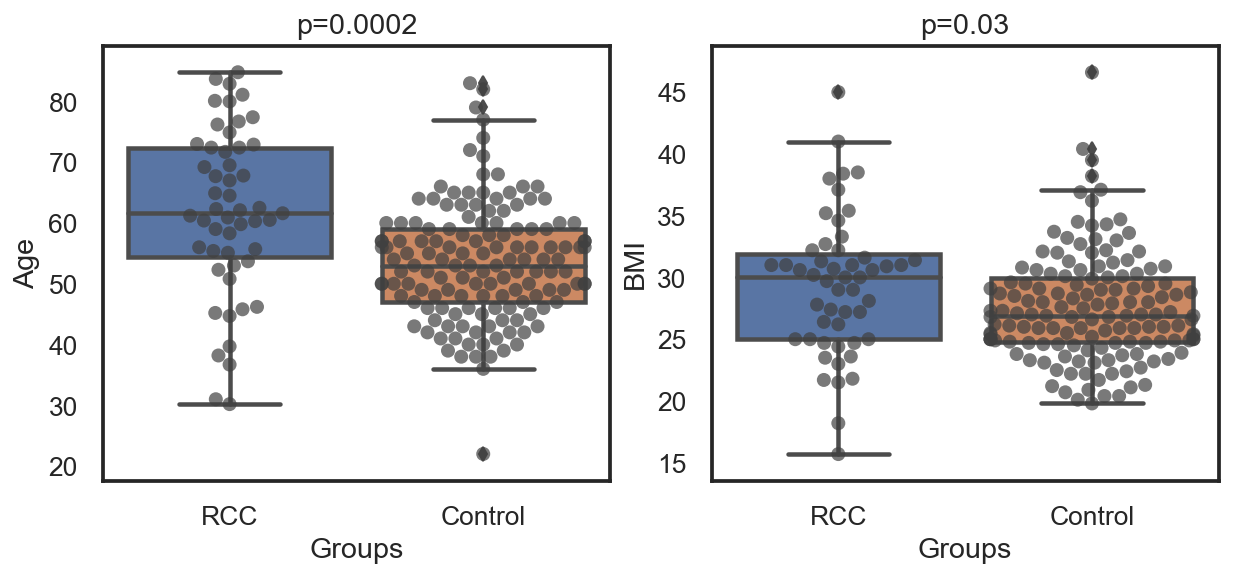

In [524]:
_, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

Age = sns.boxplot(x='Groups', y='Age', data=data2, ax=axes[0]);
sns.swarmplot(x='Groups', y='Age', data=data2, s =7, alpha=0.7, color=".25", ax=axes[0])
BMI = sns.boxplot(x='Groups', y='BMI', data=data2, ax=axes[1]);
sns.swarmplot(x='Groups', y='BMI', data=data2, s =7, alpha=0.7, color=".25", ax=axes[1])
Age.set_title('p=0.0002',loc='center');
BMI.set_title('p=0.03',loc='center');

#### Categorical Meta Data

In [525]:
# Recall that Former and Current were treated as one entity in PS matching. 
data2['Smoker'].replace({'Current': 'Former/Current', 'Former': 'Former/Current'}, inplace=True);
data2['Race'].replace({'American-Indian/Alaskan-Native': 'Others', 'Asian': 'Others', 
                      'Mixed': 'Others', 'Unk/Missing': 'Others'}, inplace=True);

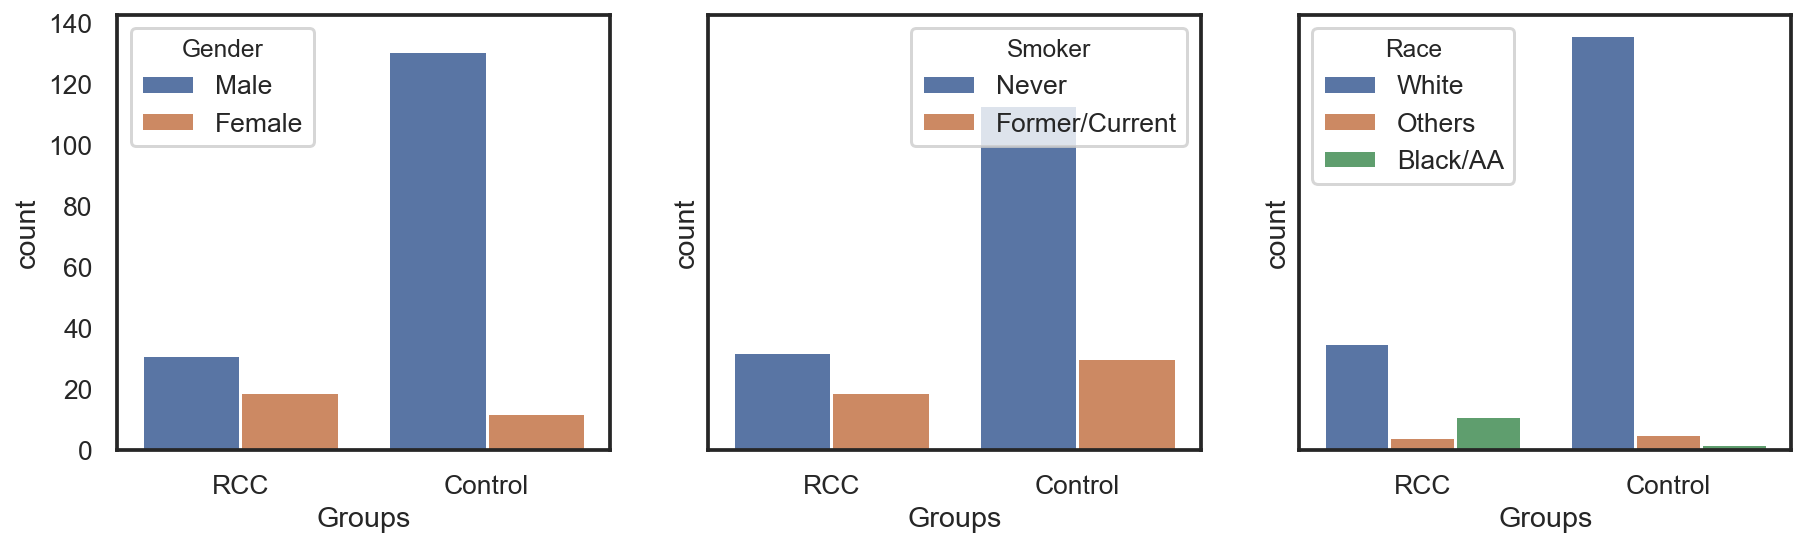

In [526]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))

sns.countplot(x='Groups', hue='Gender', data=data2, ax=axes[0]);
sns.countplot(x='Groups', hue='Smoker', data=data2, ax=axes[1]);
sns.countplot(x='Groups', hue='Race', data=data2, ax=axes[2]);

Gender

In [527]:
print(dControl['Gender'].value_counts())
print(dControl['Gender'].value_counts(normalize=True)*100)
print(dRCC['Gender'].value_counts())
print(dRCC['Gender'].value_counts(normalize=True)*100)

Male      131
Female     12
Name: Gender, dtype: int64
Male      91.608392
Female     8.391608
Name: Gender, dtype: float64
Male      31
Female    19
Name: Gender, dtype: int64
Male      62.0
Female    38.0
Name: Gender, dtype: float64


_Control_

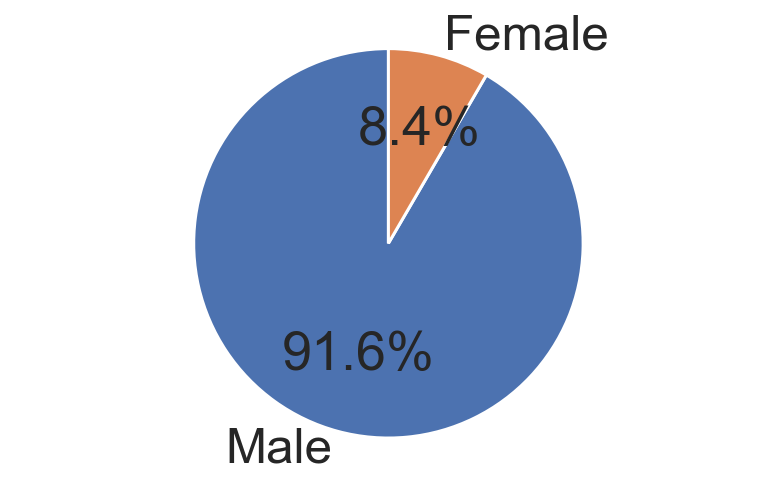

In [528]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=1.5)
raw_data = {'Gender': ['Male', 'Female'], 'Numbers': [131, 12]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)

_RCC_

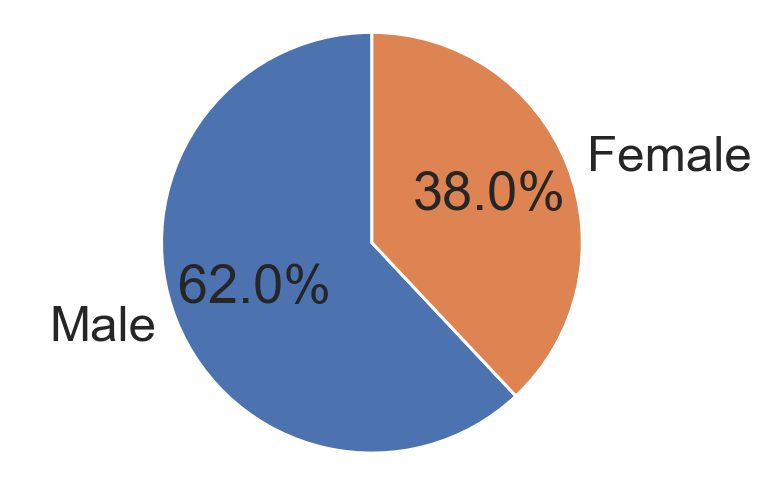

In [529]:
raw_data = {'Gender': ['Male', 'Female'], 'Numbers': [31, 19]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)

__Smoking History__

In [530]:
data2.Smoker.value_counts()

Never             145
Former/Current     49
Name: Smoker, dtype: int64

In [531]:
dControl = data2[(data2['Groups'] == 'Control')]
dRCC = data2[(data2['Groups'] == 'RCC')]
print(dControl['Smoker'].value_counts())
print(dControl['Smoker'].value_counts(normalize=True)*100)
print(dRCC['Smoker'].value_counts())
print(dRCC['Smoker'].value_counts(normalize=True)*100)

Never             113
Former/Current     30
Name: Smoker, dtype: int64
Never             79.020979
Former/Current    20.979021
Name: Smoker, dtype: float64
Never             32
Former/Current    19
Name: Smoker, dtype: int64
Never             62.745098
Former/Current    37.254902
Name: Smoker, dtype: float64


_Control_

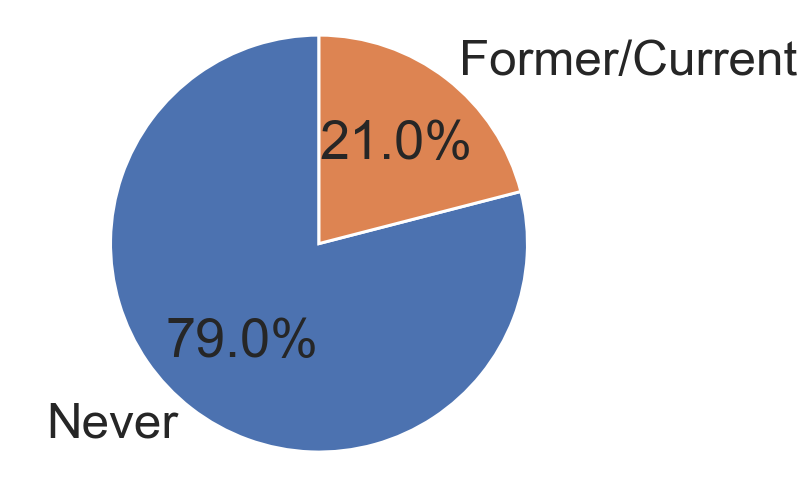

In [532]:
raw_data = {'Smoker': ['Never', 'Former/Current'],
            'Numbers': [113, 30]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)

_RCC_

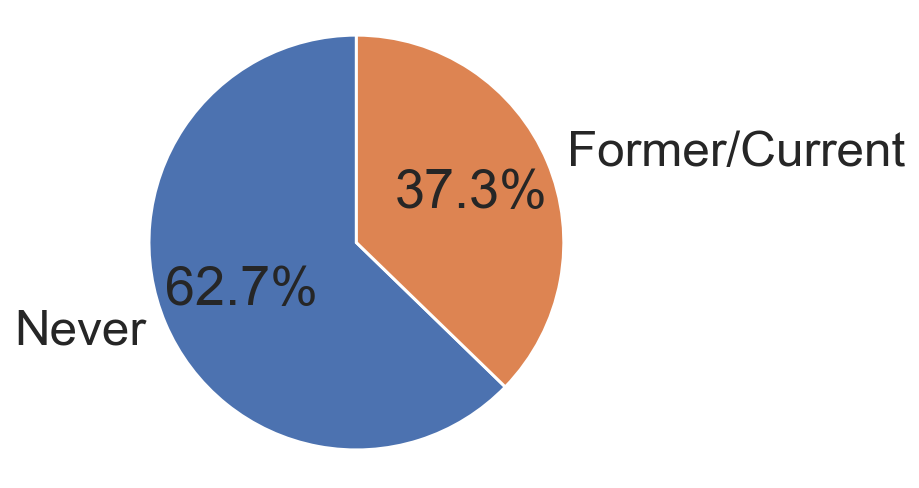

In [533]:
raw_data = {'Smoker': ['Never', 'Former/Current'],
            'Numbers': [32, 19]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)

__Race__

In [534]:
data2.Race.value_counts()

White       171
Black/AA     13
Others        9
Name: Race, dtype: int64

In [535]:
dControl = data2[(data2['Groups'] == 'Control')]
dRCC = data2[(data2['Groups'] == 'RCC')]
print(dControl['Race'].value_counts())
print(dControl['Race'].value_counts(normalize=True)*100)
print(dRCC['Race'].value_counts())
print(dRCC['Race'].value_counts(normalize=True)*100)

White       136
Others        5
Black/AA      2
Name: Race, dtype: int64
White       95.104895
Others       3.496503
Black/AA     1.398601
Name: Race, dtype: float64
White       35
Black/AA    11
Others       4
Name: Race, dtype: int64
White       70.0
Black/AA    22.0
Others       8.0
Name: Race, dtype: float64


_Control_

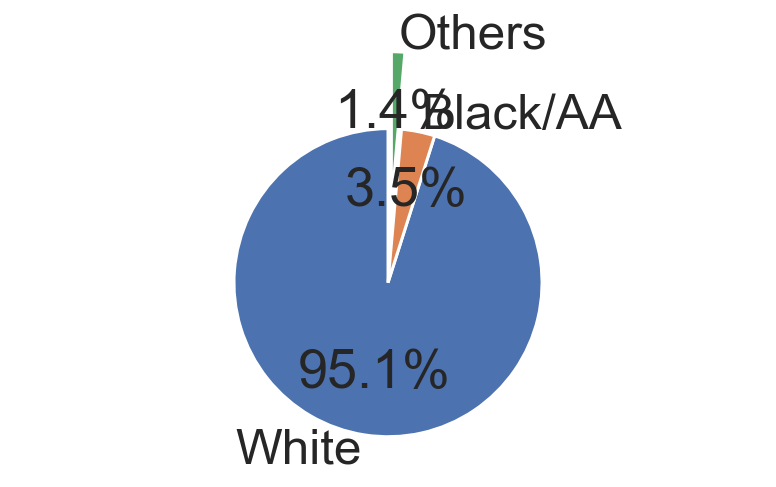

In [536]:
raw_data = {'Race': ['White', 'Black/AA', 'Others'],
            'Numbers': [136, 5, 2]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=True, shadow = False)

_RCC_

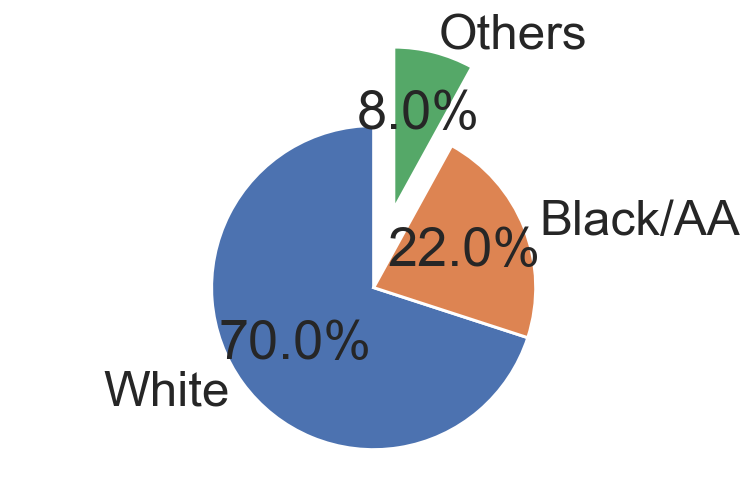

In [537]:
raw_data = {'Race': ['White', 'Black/AA', 'Others'],
            'Numbers': [35, 11, 4]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=True, shadow = False)

### [Go back to notebook content](#0)

# 7. RCC Prediction: Test Cohort
<a id="7"></a>

In [460]:
MLfeatures2 = testcohort[biomarker.iloc[:, 1:].columns]
MLfeatures2 =(MLfeatures2 - MLfeatures2.mean(axis=0))/MLfeatures2.std(axis=0) #autoscaling
MLfeatures2.shape

(194, 20)

Define features and labels.

In [461]:
dfgrp = testcohort.filter(['Groups'], axis=1)
#convert strings (RCC, Control) to integers
dfgroup = dfgrp['Groups'].map({'Control': 0, 'RCC': 1}) 
X = MLfeatures2.values
y = dfgroup.values
print (X.shape)
print (y.shape)

(194, 20)
(194,)


Train with various machine learning models.

In [462]:
# Random Forest
RF=RandomForestClassifier(n_estimators=100, random_state=123)
metric = ml_model(X, y, RF)
RF_AUC, RF_ACC, RF_PRE, RF_REC, RF_FS, RF_MCC = metric[0], metric[1], metric[2], metric[3], metric[4], metric[5]
# SVM
clf = svm.SVC(kernel='linear', probability=True)
metric = ml_model(X, y, clf)
clf_AUC, clf_ACC, clf_PRE, clf_REC, clf_FS, clf_MCC = metric[0], metric[1], metric[2], metric[3], metric[4], metric[5]
# Bagging
BAG=BaggingClassifier(n_estimators=100, random_state=123)
metric = ml_model(X, y, BAG)
BAG_AUC, BAG_ACC, BAG_PRE, BAG_REC, BAG_FS, BAG_MCC = metric[0], metric[1], metric[2], metric[3], metric[4], metric[5]
# KNN
knn = KNeighborsClassifier(n_neighbors=7)
metric = ml_model(X, y, knn)
KNN_AUC, KNN_ACC, KNN_PRE, KNN_REC, KNN_FS, KNN_MCC = metric[0], metric[1], metric[2], metric[3], metric[4], metric[5]
# Gradient Boosting
GBC=GradientBoostingClassifier(n_estimators=100, random_state=123)
metric = ml_model(X, y, GBC)
GBC_AUC, GBC_ACC, GBC_PRE, GBC_REC, GBC_FS, GBC_MCC = metric[0], metric[1], metric[2], metric[3], metric[4], metric[5]

**AUC**

In [463]:
sns.set_context('talk', font_scale=0.8)

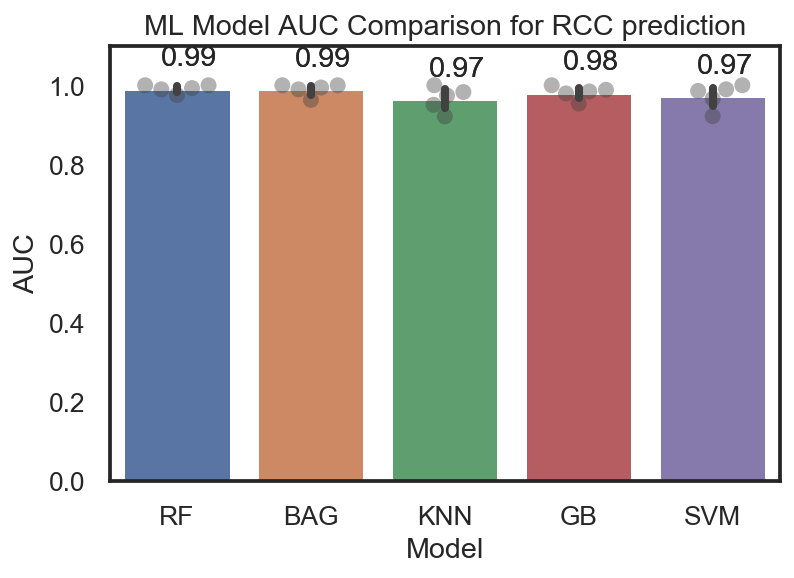

In [464]:
AUCfig = {'Model': ['RF', 'BAG', 'KNN', 'GB', 'SVM'], 
               'AUC':[mean(RF_AUC), mean(BAG_AUC), 
                           mean(KNN_AUC), mean(GBC_AUC), mean(clf_AUC)]}

afig = {'RF': RF_AUC, 'BAG': BAG_AUC, 'KNN': KNN_AUC, 'GB': GBC_AUC, 'SVM': clf_AUC}
bafig = pd.DataFrame(afig)
sns.barplot(data=bafig)
sns.swarmplot(data=bafig,s=8, alpha=0.4, color=".25")
plt.ylim(0,1.1)

MLmetric_plot(AUCfig, 'AUC');
plt.title('ML Model AUC Comparison for RCC prediction');

**Accuracy**

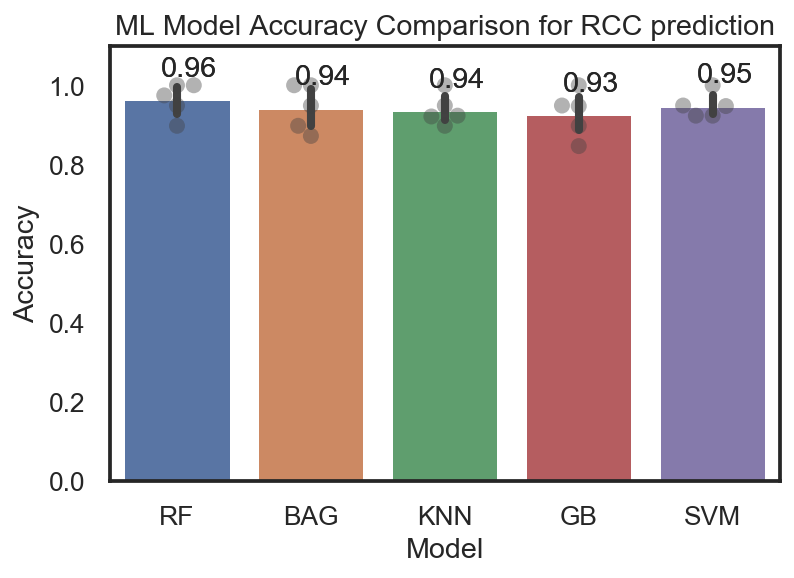

In [465]:
ACC_fig = {'Model': ['RF', 'BAG', 'KNN', 'GB', 'SVM'], 
               'Accuracy':[mean(RF_ACC), mean(BAG_ACC), 
                           mean(KNN_ACC), mean(GBC_ACC), mean(clf_ACC)]}

afig = {'RF': RF_ACC, 'BAG': BAG_ACC, 'KNN': KNN_ACC, 'GB': GBC_ACC, 'SVM': clf_ACC}
bafig = pd.DataFrame(afig)
sns.barplot(data=bafig)
sns.swarmplot(data=bafig,s=8, alpha=0.4, color=".25")
plt.ylim(0,1.1)

MLmetric_plot(ACC_fig, 'Accuracy');
plt.title('ML Model Accuracy Comparison for RCC prediction');

**Precision**

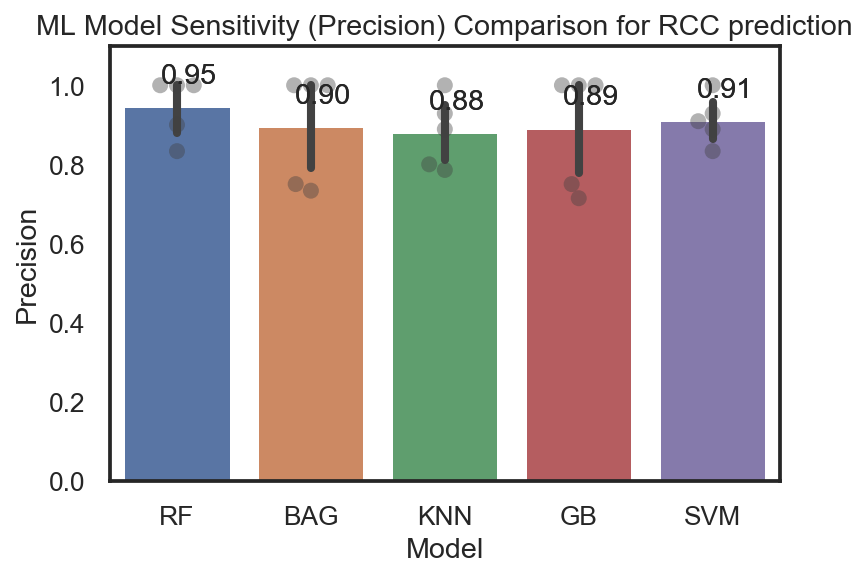

In [466]:
PREfig = {'Model': ['RF', 'BAG', 'KNN', 'GB', 'SVM'], 
               'Precision':[mean(RF_PRE), mean(BAG_PRE), 
                           mean(KNN_PRE), mean(GBC_PRE), mean(clf_PRE)]}

afig = {'RF': RF_PRE, 'BAG': BAG_PRE, 'KNN': KNN_PRE, 'GB': GBC_PRE, 'SVM': clf_PRE}
bafig = pd.DataFrame(afig)
sns.barplot(data=bafig)
sns.swarmplot(data=bafig,s=8, alpha=0.4, color=".25")
plt.ylim(0,1.1)

MLmetric_plot(PREfig, 'Precision');
plt.title('ML Model Sensitivity (Precision) Comparison for RCC prediction');

**Recall**

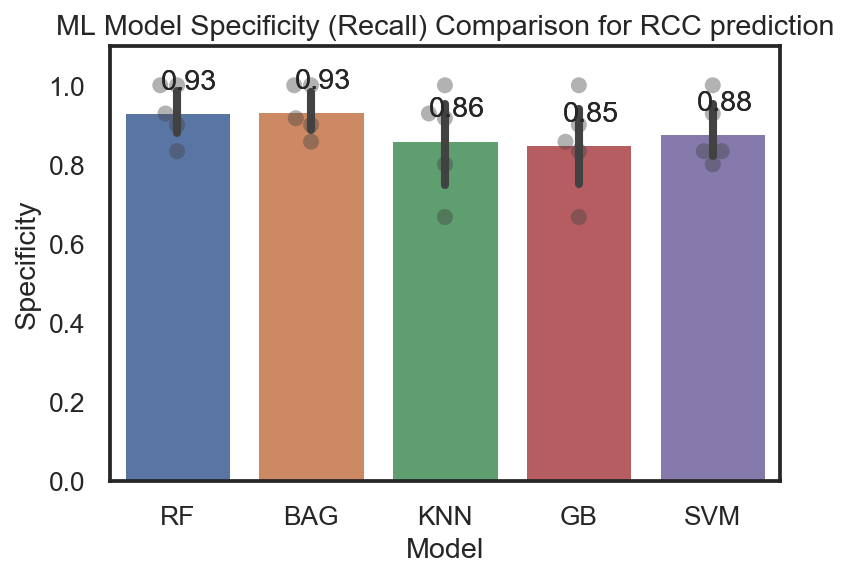

In [467]:
RECfig = {'Model': ['RF', 'BAG', 'KNN', 'GB', 'SVM'], 
               'Specificity':[mean(RF_REC), mean(BAG_REC), 
                           mean(KNN_REC), mean(GBC_REC), mean(clf_REC)]}

afig = {'RF': RF_REC, 'BAG': BAG_REC, 'KNN': KNN_REC, 'GB': GBC_REC, 'SVM': clf_REC}
bafig = pd.DataFrame(afig)
sns.barplot(data=bafig)
sns.swarmplot(data=bafig,s=8, alpha=0.4, color=".25")
plt.ylim(0,1.1)

MLmetric_plot(RECfig, 'Specificity');
plt.title('ML Model Specificity (Recall) Comparison for RCC prediction');

The best classifier is RF, and here are the feature importance from random forest:

In [489]:
feature_imp = pd.Series(RF.feature_importances_,
                        index=MLfeatures2.columns.astype(float)).sort_values(ascending=False)

No handles with labels found to put in legend.


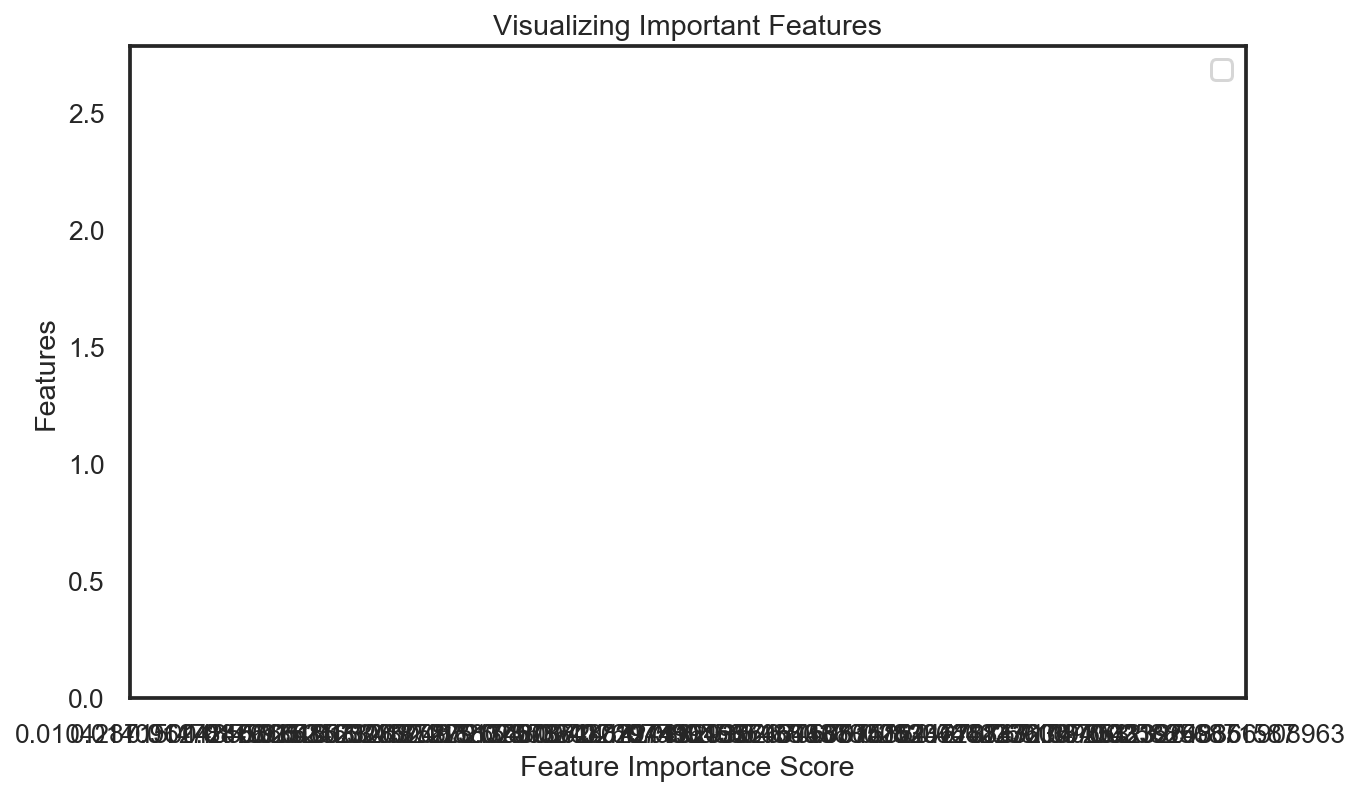

In [490]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
#plt.savefig('RF_Features.svg', dpi=300)
plt.show()

### Biomarkers: PCA, Hierarchical clustering and Boxplot Visualization

In [494]:
print (testcohort.shape)
print (MLfeatures2.shape)

(194, 7146)
(194, 20)


In [496]:
group_loc = testcohort.columns.get_loc("Groups") #autoscaling
biomarker2 =  testcohort.iloc[:, group_loc].to_frame().join(MLfeatures2)
biomarker2.shape

(194, 21)

Boxplot

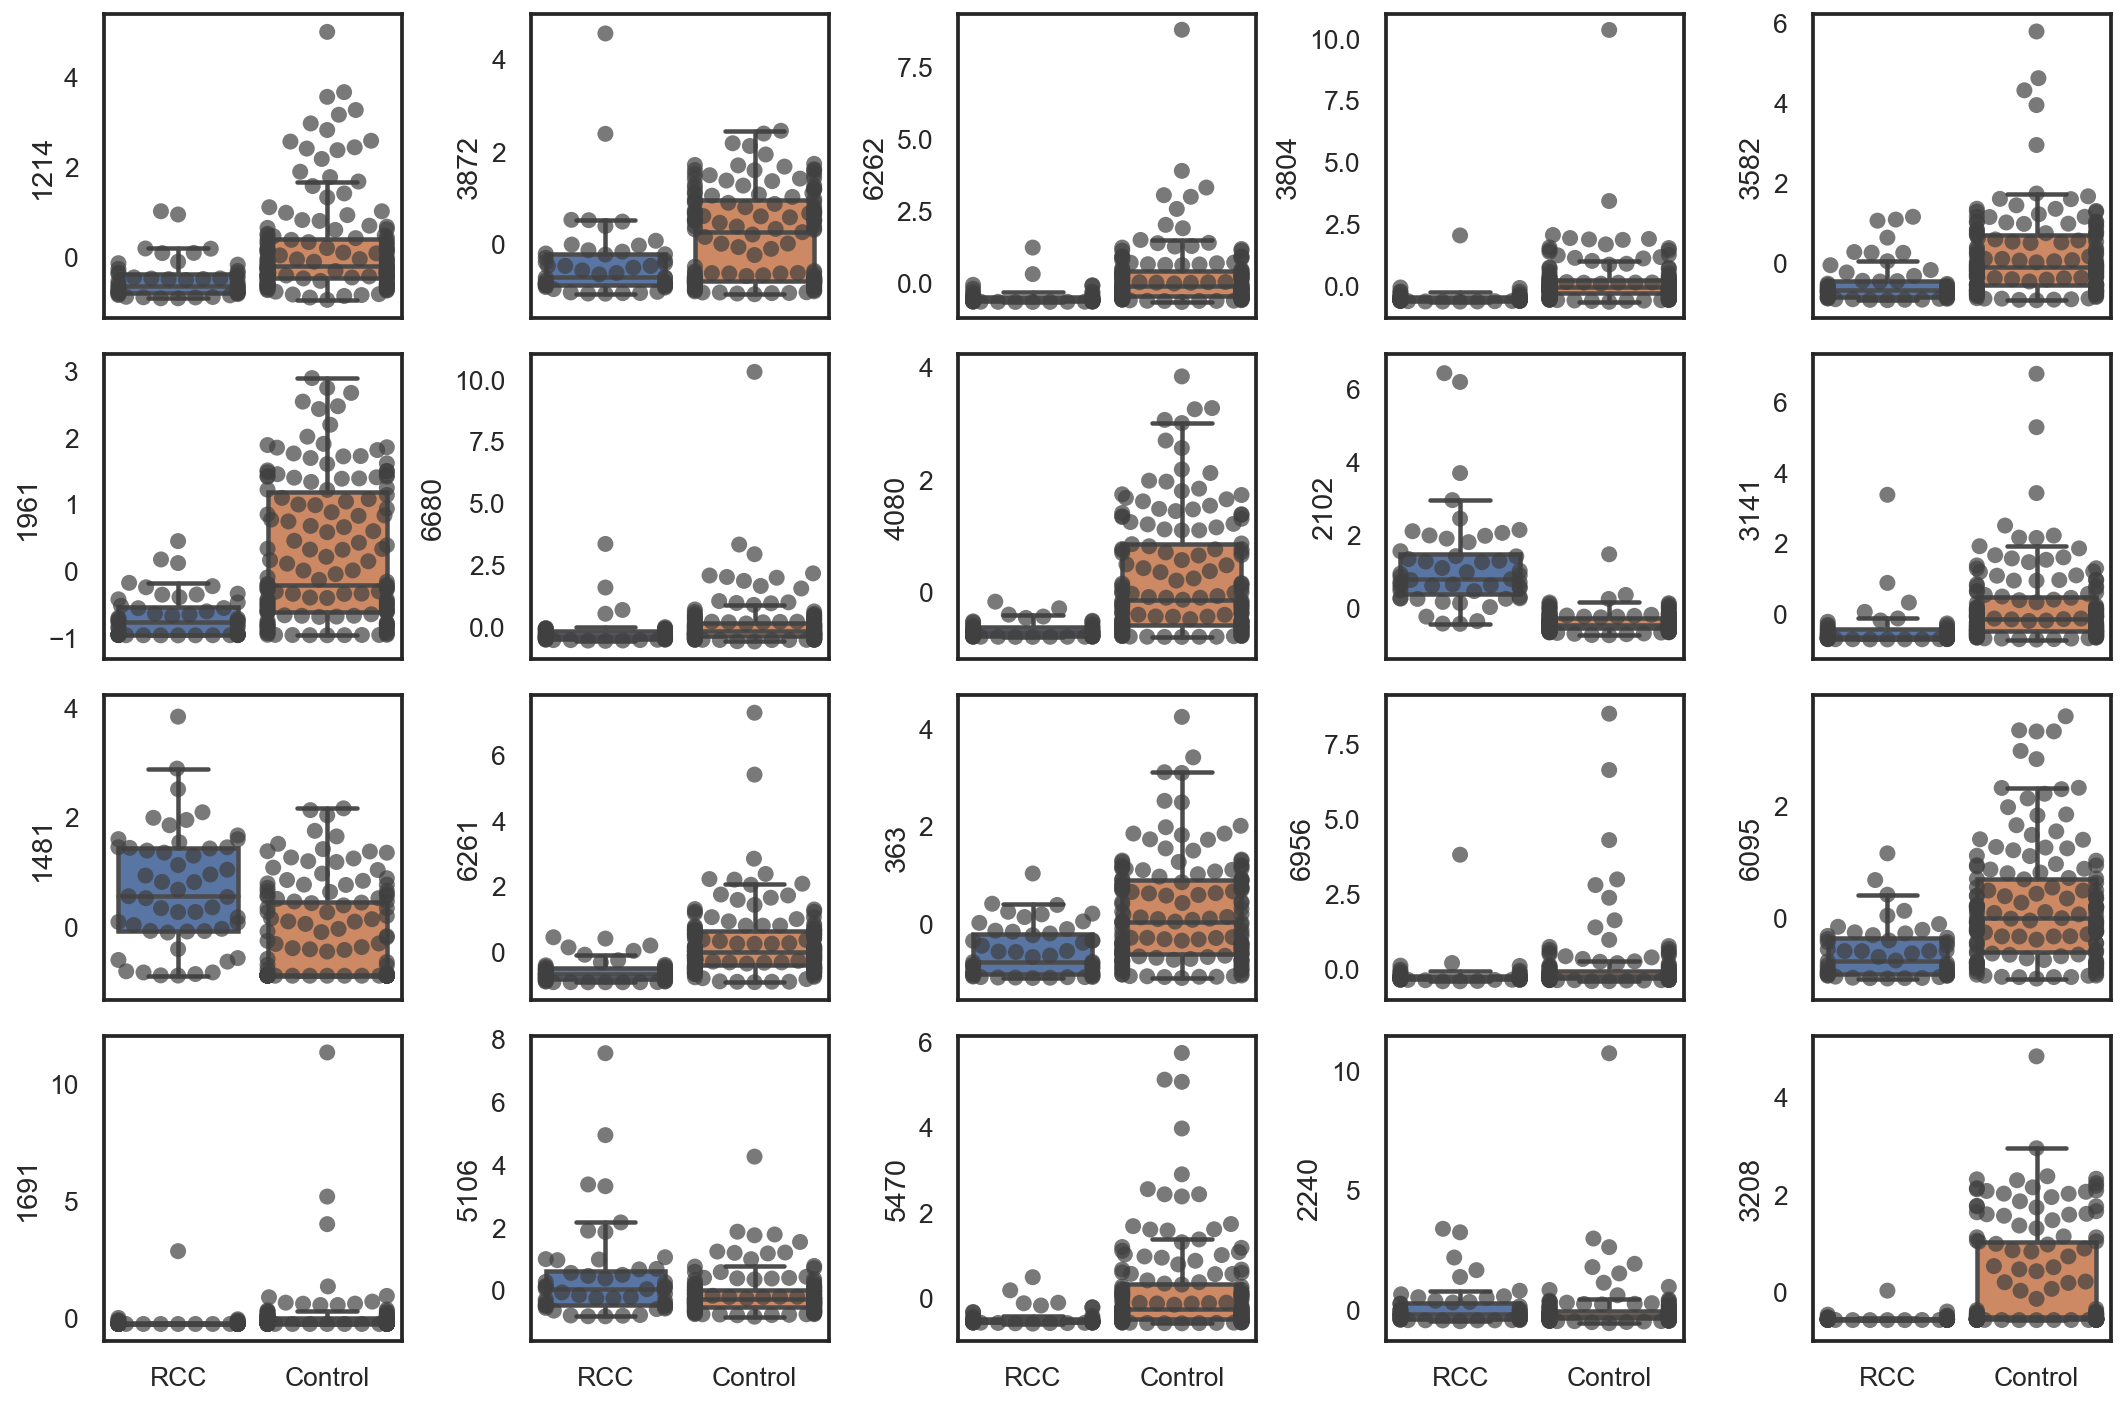

In [503]:
# Metabolites Quantification via boxplot or barplot
fig, axes = plt.subplots(nrows=4, ncols=5, sharex=True, figsize=(15, 10))
for idx, feat in enumerate(biomarker2.columns[1:]):
    ax = axes[int(idx / 5), idx % 5]
    sns.boxplot(x='Groups', y=feat, data=biomarker2, ax=ax, showfliers=False)
    #sns.barplot (x='Groups', y=feat, data=df, ax=ax, capsize=.06)
    sns.swarmplot(x='Groups', y=feat, data=biomarker2, 
                  ax=ax, s=8, alpha=0.7, color=".25");
    ax.set_xlabel('')
    ax.set_ylabel(feat) #feat
fig.tight_layout();
#plt.savefig('AUCplots2.svg', dpi=300)

**PCA score plots using all ML features**

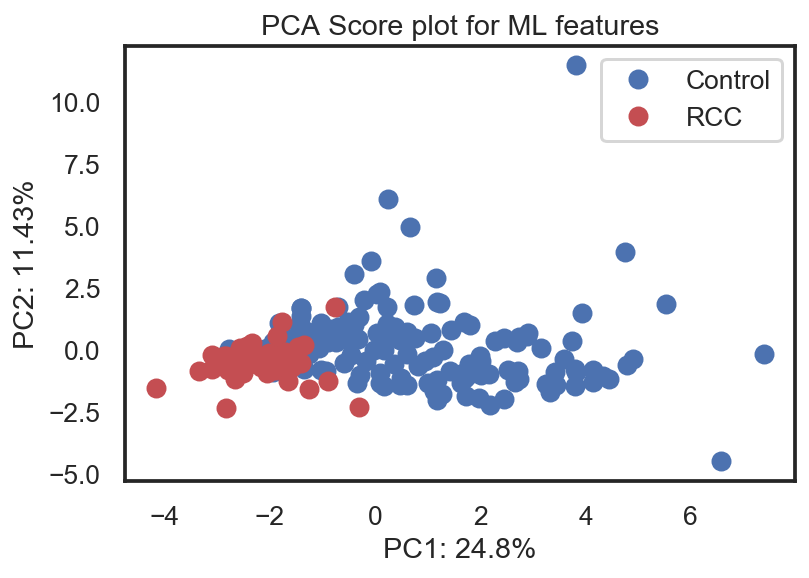

In [499]:
ylabel = biomarker2['Groups'].map({'Control' : 0, 'RCC' : 1})
PCA_Python(MLfeatures2, ylabel, False)
plt.title('PCA Score plot for ML features');

**Hierarchial Clustering using all ML features**

In [513]:
group_loc = testcohort.columns.get_loc("Groups") #autoscaling
biomarker2 =  testcohort.iloc[:, group_loc].to_frame().join(MLfeatures2)
biomarker2.shape

(194, 21)

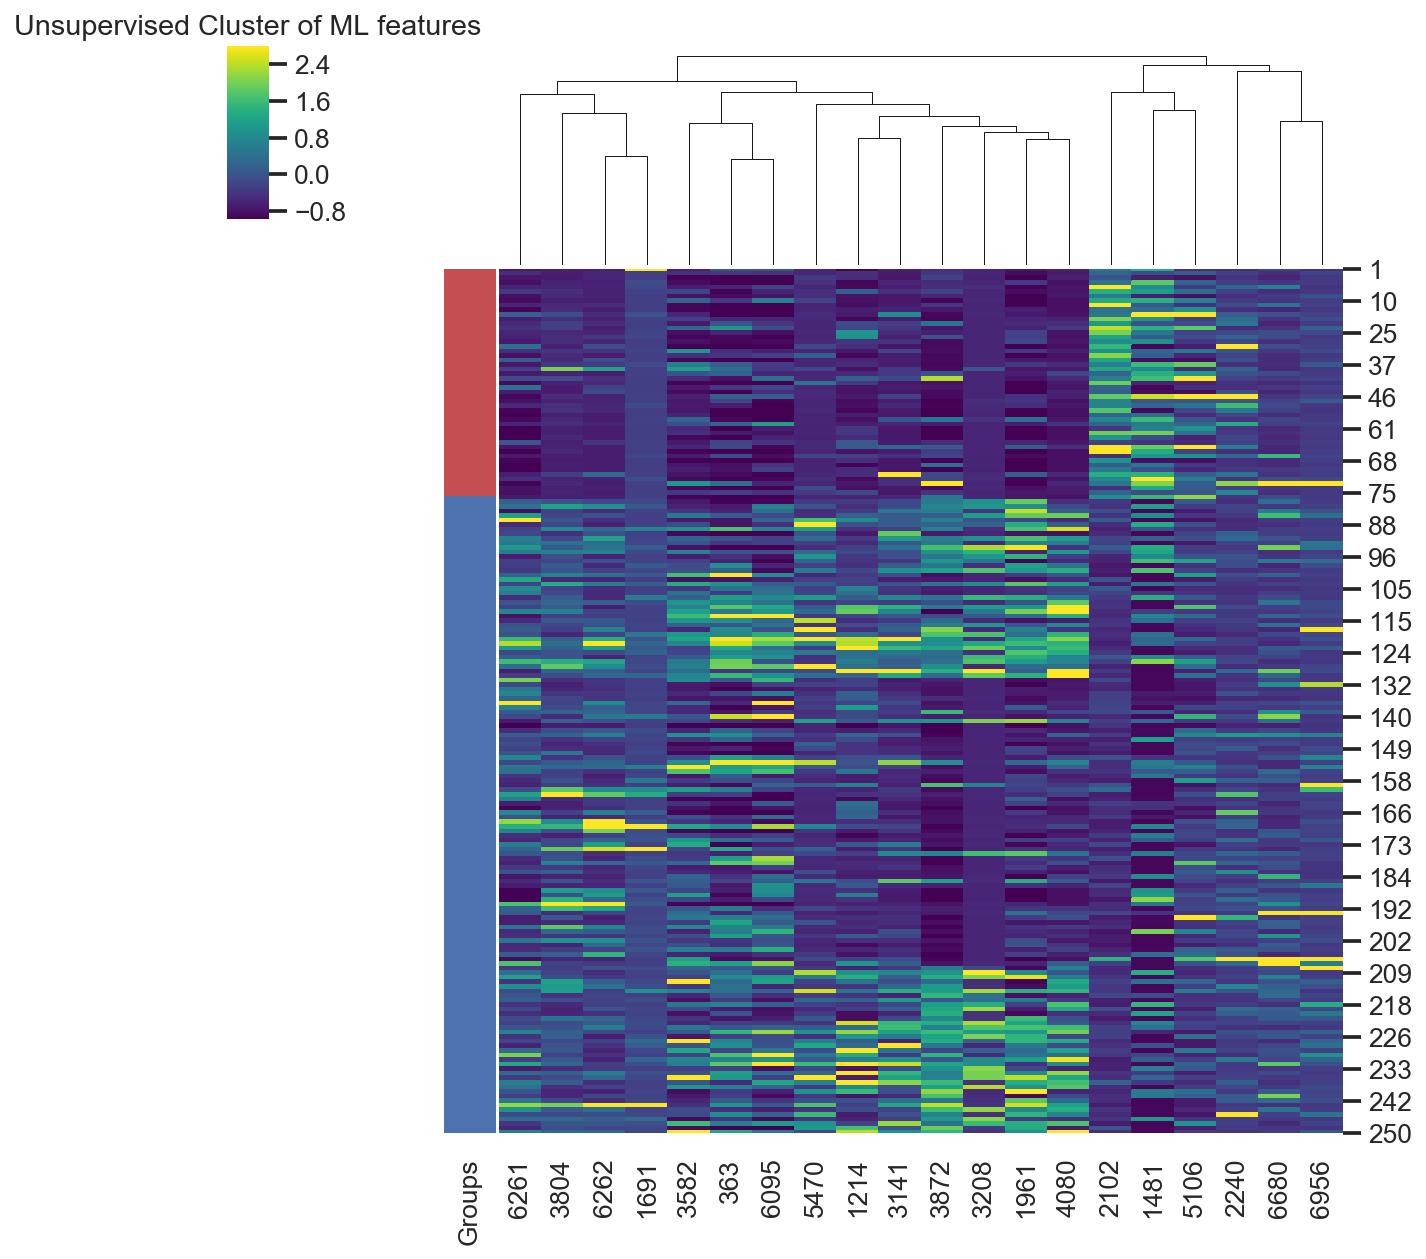

In [514]:
groups_two = biomarker2.pop('Groups')
biomarker2 = biomarker2.astype(float)
lut = dict(zip(groups_two.unique(), 'rbg'))
row_colors = groups_two.map(lut)
sns.clustermap(biomarker2, method="weighted", 
                   metric='euclidean', cmap="viridis", row_cluster=False, 
                   row_colors=row_colors, robust=True);
plt.title('Unsupervised Cluster of ML features');
# define biomarker dataframe again because of the .pop method
biomarker2 =  testcohort.iloc[:, group_loc].to_frame().join(MLfeatures2)

### [Go back to notebook content](#0)

# 8. Chemical Information of Biomarkers
<a id="8"></a>

In [553]:
MS_labels_bmarkers = MS_labels[MS_labels.ID.isin(MLfeatures.columns)]
print(MS_labels_bmarkers.shape)
MS_labels_bmarkers.head()

(20, 5)


ID      Mode RT [min]  Name      Formula
362    363  positive    1.903   363          NaN
1213  1214  positive    1.242  1214  C4 H4 N4 O2
1480  1481  positive     6.29  1481          NaN
1690  1691  positive    3.418  1691          NaN
1960  1961  positive    2.434  1961          NaN

In [554]:
MS_labels_qmarkers = MS_labels[MS_labels.ID.isin(qfeatures.columns)]
print(MS_labels_qmarkers.shape)
MS_labels_qmarkers.head()

(472, 5)


ID      Mode RT [min]                                  Name  \
0      1  positive    2.317                                     1   
8      9  positive    1.901  5-Acetylamino-6-amino-3-methyluracil   
93    94  positive    3.489                       Pseudoephedrine   
94    95  positive    1.898      3-(1H-1,2,4-Triazol-3-yl)alanine   
146  147  positive     2.58                                   147   

             Formula  
0                NaN  
8       C7 H10 N4 O3  
93       C10 H15 N O  
94       C5 H8 N4 O2  
146  C33 H41 N O6 P2

MS_labels_bmarkers.to_excel('RCC_20features.xlsx')

MS_labels_qmarkers.to_excel('RCC_472features.xlsx')

In [567]:
biomarker_v1 = pd.read_excel('biomarker_v1.xlsx')
#biomarker_v1.head()

__Intersection of Biomarkers__

In [562]:
biomarker_int = list(set(biomarker_v1.columns) & set(MS_labels_bmarkers['Name']))
print (len(biomarker_int))
biomarker_int

11


[3872,
 3141,
 'N,N-Diisopropylethylamine (DIPEA)',
 1481,
 363,
 6956,
 4080,
 '1D-chiro-inositol',
 6261,
 6262,
 6680]

In [566]:
qfeatures_v1 = pd.read_excel('qfeatures_v1.xlsx')
#qfeatures_v1.head()

__Intersection of qmarkers__

In [565]:
qmarker_int = list(set(qfeatures_v1['Features']) & set(MS_labels_qmarkers['Name']))
print (len(qmarker_int))

433
